# IMPORT LIBRARIES

In [1]:
# Read .las files
import lasio
# Read Database
import pandas as pd
import numpy as np
# Graphics
import matplotlib.pyplot as plt
# Statistics
import math
from scipy.fft import fft, fftfreq
from scipy.signal import decimate
from itertools import combinations

# Reading Data

In [2]:
pathCurramba = "G:\\Mi unidad\\UNIVERSIDAD\\SEMESTRE 10\\PAE\\SSJ\\CURRAMBA_EST-1\\DATA\\" ## Spanish path
#pathCurramba = "G:/My Drive/UNIVERSIDAD/SEMESTRE 10/PAE/SSJ/CURRAMBA_EST-1/DATA/" ## English path

mainFile = "10162356_Lewis_Energy_Curramba_Est-1_TCombo_Main_20Dec2012.las"

# Reading with lasio
TComboMain_Read = lasio.read(pathCurramba + mainFile)
currambaData = TComboMain_Read.df()
currambaData.reset_index(inplace=True)

dimensions = currambaData.shape
print("DataFrame dimension:", dimensions, "\n")
print(currambaData)
#currambaData.head()

DataFrame dimension: (25255, 26) 

             DEPT    AO10    AO20    AO30    AO60    AO90     BS       CDF  \
0      1000.04333  1.3658  1.5917  1.6603  1.8376  1.8405  12.25  925.0289   
1      1000.12666  1.3658  1.5917  1.6603  1.8376  1.8405  12.25  924.6499   
2      1000.20999  1.3658  1.5917  1.6603  1.8376  1.8405  12.25  924.2708   
3      1000.29332  1.3658  1.5917  1.6603  1.8376  1.8405  12.25  923.8918   
4      1000.37665  1.3658  1.5917  1.6603  1.8376  1.8405  12.25  923.5127   
...           ...     ...     ...     ...     ...     ...    ...       ...   
25250  3104.12583     NaN     NaN     NaN     NaN     NaN   8.50  813.8834   
25251  3104.20916     NaN     NaN     NaN     NaN     NaN   8.50  811.4268   
25252  3104.29249     NaN     NaN     NaN     NaN     NaN   8.50  808.9703   
25253  3104.37582     NaN     NaN     NaN     NaN     NaN   8.50  806.5137   
25254  3104.45915     NaN     NaN     NaN     NaN     NaN   8.50  804.0572   

            GR    HCAL  ... 

# General Statistics

In [3]:
statisticsNames = ['Cantidad de NaN', 'Promedio', 'Desviación estandar', 'Primer Cuartil', 'Tercer Cuartil', 'Máximo', 'Mínimo']

# Amount of NaN
amount_nan = currambaData.isna().sum()
# Mean (with NaN)
mean = currambaData.mean()
# Standard deviation (with  NaN)
std = currambaData.std()
# First quartile (Q1)
firstQuartile = currambaData.quantile(0.25)
# Third quartile (Q3)
thirdQuartile = currambaData.quantile(0.75)
# Max
maxx = currambaData.max()
# Min
minn = currambaData.min()

#DataFrame of Statistics
currambaDataStatistic_DF = pd.DataFrame({
    "Statistics": statisticsNames,
    **{col: [amount_nan[col], mean[col], std[col], firstQuartile[col], thirdQuartile[col], maxx[col], minn[col]] for col in currambaData.columns}
})

# All columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#Show DataFrame
display(currambaDataStatistic_DF)

Statistics         DEPT           AO10           AO20  \
0      Cantidad de NaN     0.000000      99.000000      99.000000   
1             Promedio  2052.251240      -2.560660      -2.392775   
2  Desviación estandar   607.528603     829.248236     829.440768   
3       Primer Cuartil  1526.147285       1.844775       1.953575   
4       Tercer Cuartil  2578.355195       3.089525       3.282700   
5               Máximo  3104.459150      19.201000      24.273300   
6               Mínimo  1000.043330 -131521.266100 -131551.604500   

            AO30           AO60           AO90         BS          CDF  \
0      99.000000      99.000000      99.000000   0.000000     0.000000   
1      -2.363017      -2.273474      -2.263224   8.679523   976.439466   
2     829.567267     829.686079     829.676047   0.800277    56.071031   
3       1.989700       2.081300       2.093400   8.500000   944.862750   
4       3.338800       3.460175       3.467025   8.500000   988.885400   
5      19.986200      21.312600      22.036000  12.250000  1564.628100   
6 -131571.655400 -131590.426800 -131588.826900   8.500000   804.057200   

          GR       HCAL           HDRA         ICV         IHV       NPOR_LIM  \
0   0.000000   0.000000     708.000000    0.000000    0.000000     876.000000   
1  44.617670   8.081805      -6.419718  102.689304  382.549930      -6.478259   
2   8.113172   0.680797    1010.439323   53.801595  214.326398    1077.195589   
3  40.185500   7.985400       0.010700   56.684600  197.147450       0.348000   
4  49.369750   8.360250       0.047000  144.124200  564.289750       0.481000   
5  78.322000  11.923700       2.124100  191.400100  725.144800       1.225200   
6  17.101100   3.534800 -158310.369200    0.063400    0.197000 -168190.484200   

        NPOR_SAN           PEF8           RHO8          RLA1          RLA2  \
0     876.000000     708.000000     708.000000      0.000000      0.000000   
1      -6.443127      -1.471098      -4.219678     26.775332     26.761239   
2    1077.239054    1013.683327    1012.729719   1218.338252   1218.338412   
3       0.392400       4.223900       2.106700      2.124900      2.120200   
4       0.508550       5.467500       2.343500      3.451250      3.453750   
5       1.225600      10.000000       4.628800  75526.029700  75526.029000   
6 -168197.235600 -158813.536700 -158666.999900      0.058000      0.052200   

           RLA3          RLA4          RLA5       RWA_HILT      RXO8  \
0      0.000000      0.000000      0.000000     876.000000   0.00000   
1     26.776228     26.795924     26.743555      -6.570997   3.36870   
2   1218.338106   1218.337680   1218.338576    1077.125087   3.56966   
3      2.135500      2.154150      2.117500       0.274600   2.10855   
4      3.475350      3.500550      3.449750       0.368700   3.55235   
5  75526.029000  75526.029100  75526.029100       0.946600  82.45320   
6      0.053300      0.052000      0.053600 -168179.569700   0.06290   

           SP         TENS  
0    0.000000     0.000000  
1 -284.122324  1665.657729  
2   39.087476   167.864273  
3 -300.023850  1522.795000  
4 -281.615950  1790.581200  
5  -96.026400  2361.163000  
6 -313.779200  1285.291700

# Filters

## By Depth

In [4]:
### PANDAS DB -- SET LIMITS
currambaData_filteredDeep = currambaData[(currambaData['DEPT'] >= 1200) & (currambaData['DEPT'] <= 2500)]

dimensions = currambaData_filteredDeep.shape

print("Dimensiones del DataFrame:", dimensions, "\n")
currambaData_filteredDeep.reset_index(inplace=True)

# PANDAS TO NUMPY ARRANGEMENT
usefulProperties = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
usefulProperties_2 = ['DEPT', 'AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
usefulProperties_AO = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90']

# NUMPY ARRANGEMENT
np_currambaData_filteredDeep = currambaData_filteredDeep[usefulProperties].to_numpy()
np_currambaData_filteredDeep_2 = currambaData_filteredDeep[usefulProperties_2].to_numpy()
np_currambaData_filteredDeep_AO = currambaData_filteredDeep[usefulProperties_AO].to_numpy()

#print(array_datos)
currambaData_filteredDeep.head(10)

Dimensiones del DataFrame: (15601, 26) 



index        DEPT    AO10    AO20    AO30    AO60    AO90   BS       CDF  \
0   2400  1200.03533  1.9412  2.0652  2.1276  2.2697  2.2883  8.5  953.7709   
1   2401  1200.11866  1.8980  2.0286  2.0963  2.2296  2.2477  8.5  954.9355   
2   2402  1200.20199  1.8547  1.9919  2.0649  2.1896  2.2072  8.5  956.1001   
3   2403  1200.28532  1.8167  1.9559  2.0316  2.1506  2.1674  8.5  957.2648   
4   2404  1200.36865  1.7859  1.9206  1.9956  2.1130  2.1289  8.5  958.4294   
5   2405  1200.45198  1.7551  1.8854  1.9597  2.0753  2.0903  8.5  959.5940   
6   2406  1200.53531  1.7342  1.8624  1.9351  2.0497  2.0641  8.5  960.5057   
7   2407  1200.61864  1.7270  1.8561  1.9260  2.0403  2.0548  8.5  961.0733   
8   2408  1200.70197  1.7197  1.8498  1.9169  2.0309  2.0456  8.5  961.6409   
9   2409  1200.78530  1.7195  1.8501  1.9145  2.0284  2.0432  8.5  962.2085   

        GR    HCAL    HDRA       ICV       IHV  NPOR_LIM  NPOR_SAN    PEF8  \
0  53.6113  8.1502  0.0548  176.7094  683.7194    0.4856    0.5113  7.2495   
1  53.5514  8.1300  0.0533  176.7014  683.6891    0.4845    0.5102  7.4351   
2  53.4914  8.1211  0.0517  176.6934  683.6588    0.4835    0.5091  7.5930   
3  53.4314  8.1131  0.0501  176.6853  683.6286    0.4824    0.5081  7.7131   
4  53.3714  8.1110  0.0484  176.6773  683.5983    0.4813    0.5070  7.7651   
5  53.3114  8.1126  0.0468  176.6693  683.5680    0.4802    0.5059  7.7247   
6  53.4502  8.1100  0.0455  176.6615  683.5379    0.4815    0.5072  7.6566   
7  53.8591  8.1099  0.0446  176.6538  683.5079    0.4862    0.5117  7.5510   
8  54.2680  8.1286  0.0439  176.6461  683.4780    0.4908    0.5161  7.4935   
9  54.6769  8.1416  0.0438  176.6385  683.4481    0.4955    0.5205  7.5016   

     RHO8    RLA1    RLA2    RLA3    RLA4    RLA5  RWA_HILT    RXO8        SP  \
0  2.0924  2.1564  2.1898  2.2091  2.2329  2.1648    0.3615  2.3116 -275.8000   
1  2.1618  2.2538  2.2787  2.2836  2.2958  2.1994    0.3631  2.2533 -275.8073   
2  2.2155  2.2655  2.2863  2.2813  2.2902  2.1916    0.3647  2.1980 -275.8146   
3  2.2477  2.1607  2.1834  2.1744  2.1914  2.1262    0.3662  2.1469 -275.8218   
4  2.2404  2.1027  2.1236  2.1182  2.1399  2.0931    0.3678  2.0984 -275.8291   
5  2.1794  2.1083  2.1221  2.1309  2.1525  2.1039    0.3693  2.0533 -275.8364   
6  2.1108  2.0516  2.0657  2.0863  2.1088  2.0690    0.3695  2.0183 -275.8278   
7  2.0318  1.9103  1.9344  1.9637  1.9885  1.9716    0.3678  1.9969 -275.7976   
8  1.9809  1.8947  1.9059  1.9377  1.9620  1.9496    0.3661  1.9864 -275.7674   
9  1.9681  2.0501  2.0175  2.0432  2.0630  2.0301    0.3644  1.9906 -275.7372   

        TENS  
0  1412.6902  
1  1413.2568  
2  1413.8235  
3  1414.3901  
4  1414.9568  
5  1415.5234  
6  1416.7610  
7  1418.9109  
8  1421.0608  
9  1423.2107

## Statistics

In [5]:
statisticsNames = ['Cantidad de NaN', 'Promedio', 'Desviación estandar', 'Primer Cuartil', 'Tercer Cuartil', 'Máximo', 'Mínimo']

# Amount of NaN
amount_nan = currambaData_filteredDeep.isna().sum()
# Mean (with NaN)
mean = currambaData_filteredDeep.mean()
# Standard deviation (with  NaN)
std = currambaData_filteredDeep.std()
# First quartile (Q1)
firstQuartile = currambaData_filteredDeep.quantile(0.25)
# Third quartile (Q3)
thirdQuartile = currambaData_filteredDeep.quantile(0.75)
# Max
maxx = currambaData_filteredDeep.max()
# Min
minn = currambaData_filteredDeep.min()

#DataFrame of Statistics
currambaData_filteredDeep_DF = pd.DataFrame({
    "Statistics": statisticsNames,
    **{col: [amount_nan[col], mean[col], std[col], firstQuartile[col], thirdQuartile[col], maxx[col], minn[col]] for col in currambaData.columns}
})

# All columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#Show DataFrame
display(currambaData_filteredDeep_DF)

Statistics         DEPT       AO10       AO20       AO30  \
0      Cantidad de NaN     0.000000   0.000000   0.000000   0.000000   
1             Promedio  1850.009330   2.691412   2.854665   2.878755   
2  Desviación estandar   375.298747   1.496893   1.645112   1.554664   
3       Primer Cuartil  1525.022330   1.781200   1.887400   1.923900   
4       Tercer Cuartil  2174.996330   3.138100   3.325400   3.383600   
5               Máximo  2499.983330  19.201000  24.273300  19.986200   
6               Mínimo  1200.035330   0.972200   0.995400   1.088400   

        AO60       AO90   BS          CDF         GR      HCAL      HDRA  \
0   0.000000   0.000000  0.0     0.000000   0.000000  0.000000  0.000000   
1   2.961419   2.976058  8.5   996.900576  43.571771  8.030101  0.027754   
2   1.471937   1.465425  0.0    61.284677   8.035346  0.465011  0.023640   
3   2.011000   2.025900  8.5   964.402300  38.993500  7.886300  0.008200   
4   3.533400   3.560000  8.5  1009.790800  47.363500  8.310500  0.044300   
5  21.312600  22.036000  8.5  1564.628100  78.322000  9.726600  0.135400   
6   1.288800   1.293900  8.5   915.395700  23.667600  6.008200 -0.021200   

          ICV         IHV  NPOR_LIM  NPOR_SAN       PEF8      RHO8       RLA1  \
0    0.000000    0.000000  0.000000  0.000000   0.000000  0.000000   0.000000   
1  121.135828  455.558097  0.414738  0.449990   4.802871  2.186596   3.164070   
2   30.820291  130.334638  0.092271  0.082591   1.099385  0.156680   2.466263   
3   95.045500  343.308300  0.348500  0.392700   4.082800  2.064600   2.034700   
4  144.304200  564.770400  0.488900  0.515100   5.303000  2.302100   3.618400   
5  176.709400  683.719400  0.682500  0.691600  10.000000  2.856200  57.424600   
6   63.569900  224.977800  0.111700  0.159600   2.336700  1.694500   1.233900   

        RLA2       RLA3       RLA4       RLA5  RWA_HILT       RXO8  \
0   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
1   3.143926   3.157706   3.177189   3.125318  0.342048   3.567098   
2   2.389150   2.380100   2.370612   2.340353  0.074158   4.143990   
3   2.031000   2.041800   2.058500   2.023400  0.298400   2.020700   
4   3.605100   3.617500   3.637600   3.589100  0.379800   3.817900   
5  54.572700  54.347100  53.566700  52.983500  0.828400  82.453200   
6   1.238500   1.242700   1.242400   1.214700  0.078700   0.893500   

           SP         TENS  
0    0.000000     0.000000  
1 -288.764328  1635.038007  
2    8.527112   126.191382  
3 -297.327900  1522.204300  
4 -281.604300  1729.392500  
5 -273.813600  2361.163000  
6 -305.066900  1381.929000

# Graphics of Leaked Data

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

print(np_currambaData_filteredDeep)

[[ 1.20003533e+03  1.94120000e+00  2.06520000e+00 ...  8.15020000e+00
   2.09240000e+00 -2.75800000e+02]
 [ 1.20011866e+03  1.89800000e+00  2.02860000e+00 ...  8.13000000e+00
   2.16180000e+00 -2.75807300e+02]
 [ 1.20020199e+03  1.85470000e+00  1.99190000e+00 ...  8.12110000e+00
   2.21550000e+00 -2.75814600e+02]
 ...
 [ 2.49981667e+03  2.86190000e+00  3.16190000e+00 ...  8.02090000e+00
   2.33570000e+00 -2.98455600e+02]
 [ 2.49990000e+03  2.90920000e+00  3.18170000e+00 ...  8.02680000e+00
   2.31820000e+00 -2.98447400e+02]
 [ 2.49998333e+03  2.95650000e+00  3.20160000e+00 ...  8.01790000e+00
   2.30090000e+00 -2.98439100e+02]]


## AO GRAPHICS

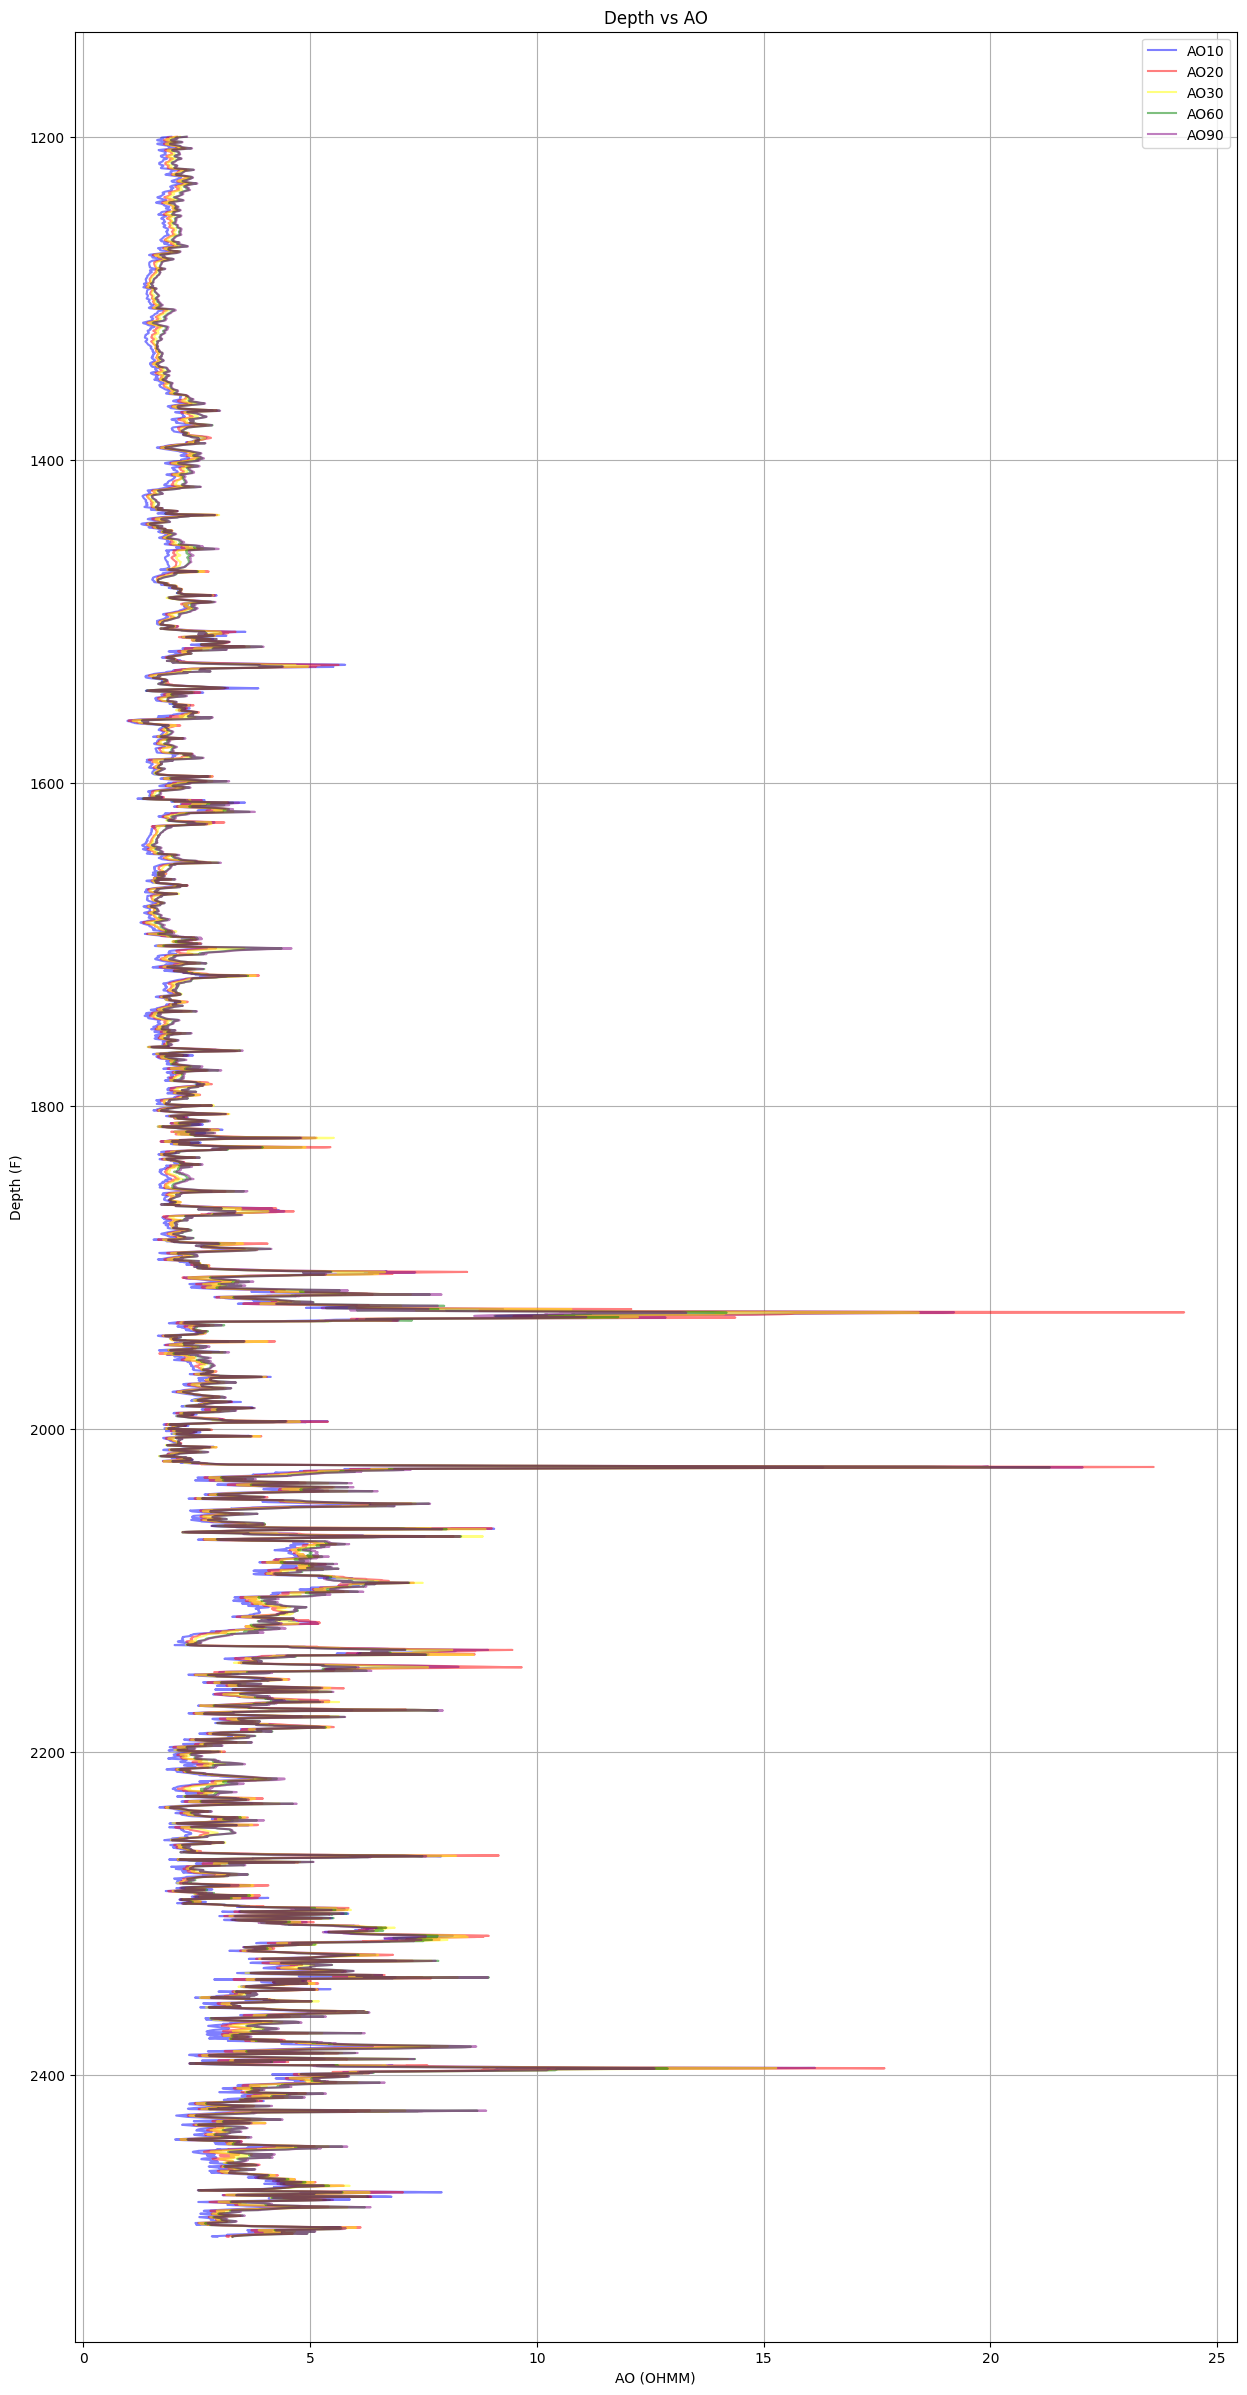

In [7]:
###usefulProperties = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

namesAO = ['AO10', 'AO20', 'AO30', 'AO60', 'AO90']
colorAO = {'AO10': 'blue' , 'AO20': 'red', 'AO30': 'yellow', 'AO60':'green', 'AO90':'purple'}

plt.figure(figsize=(15, 30))

for AO in namesAO:
    plt.plot(currambaData_filteredDeep[AO], currambaData_filteredDeep['DEPT'], label=AO, color= colorAO[AO], alpha=0.5 )

plt.xlabel('AO (OHMM)')
#plt.xlim(0, 25)
plt.ylabel('Depth (F)')
#plt.ylim(1100, 2600)

plt.title('Depth vs AO')
plt.grid(True)
plt.legend()

plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la profundidad creciente hacia abajo
plt.show()

# Data

## Inverse deep | AO10 - CDF - GR - HCAL - RHO8 - SP

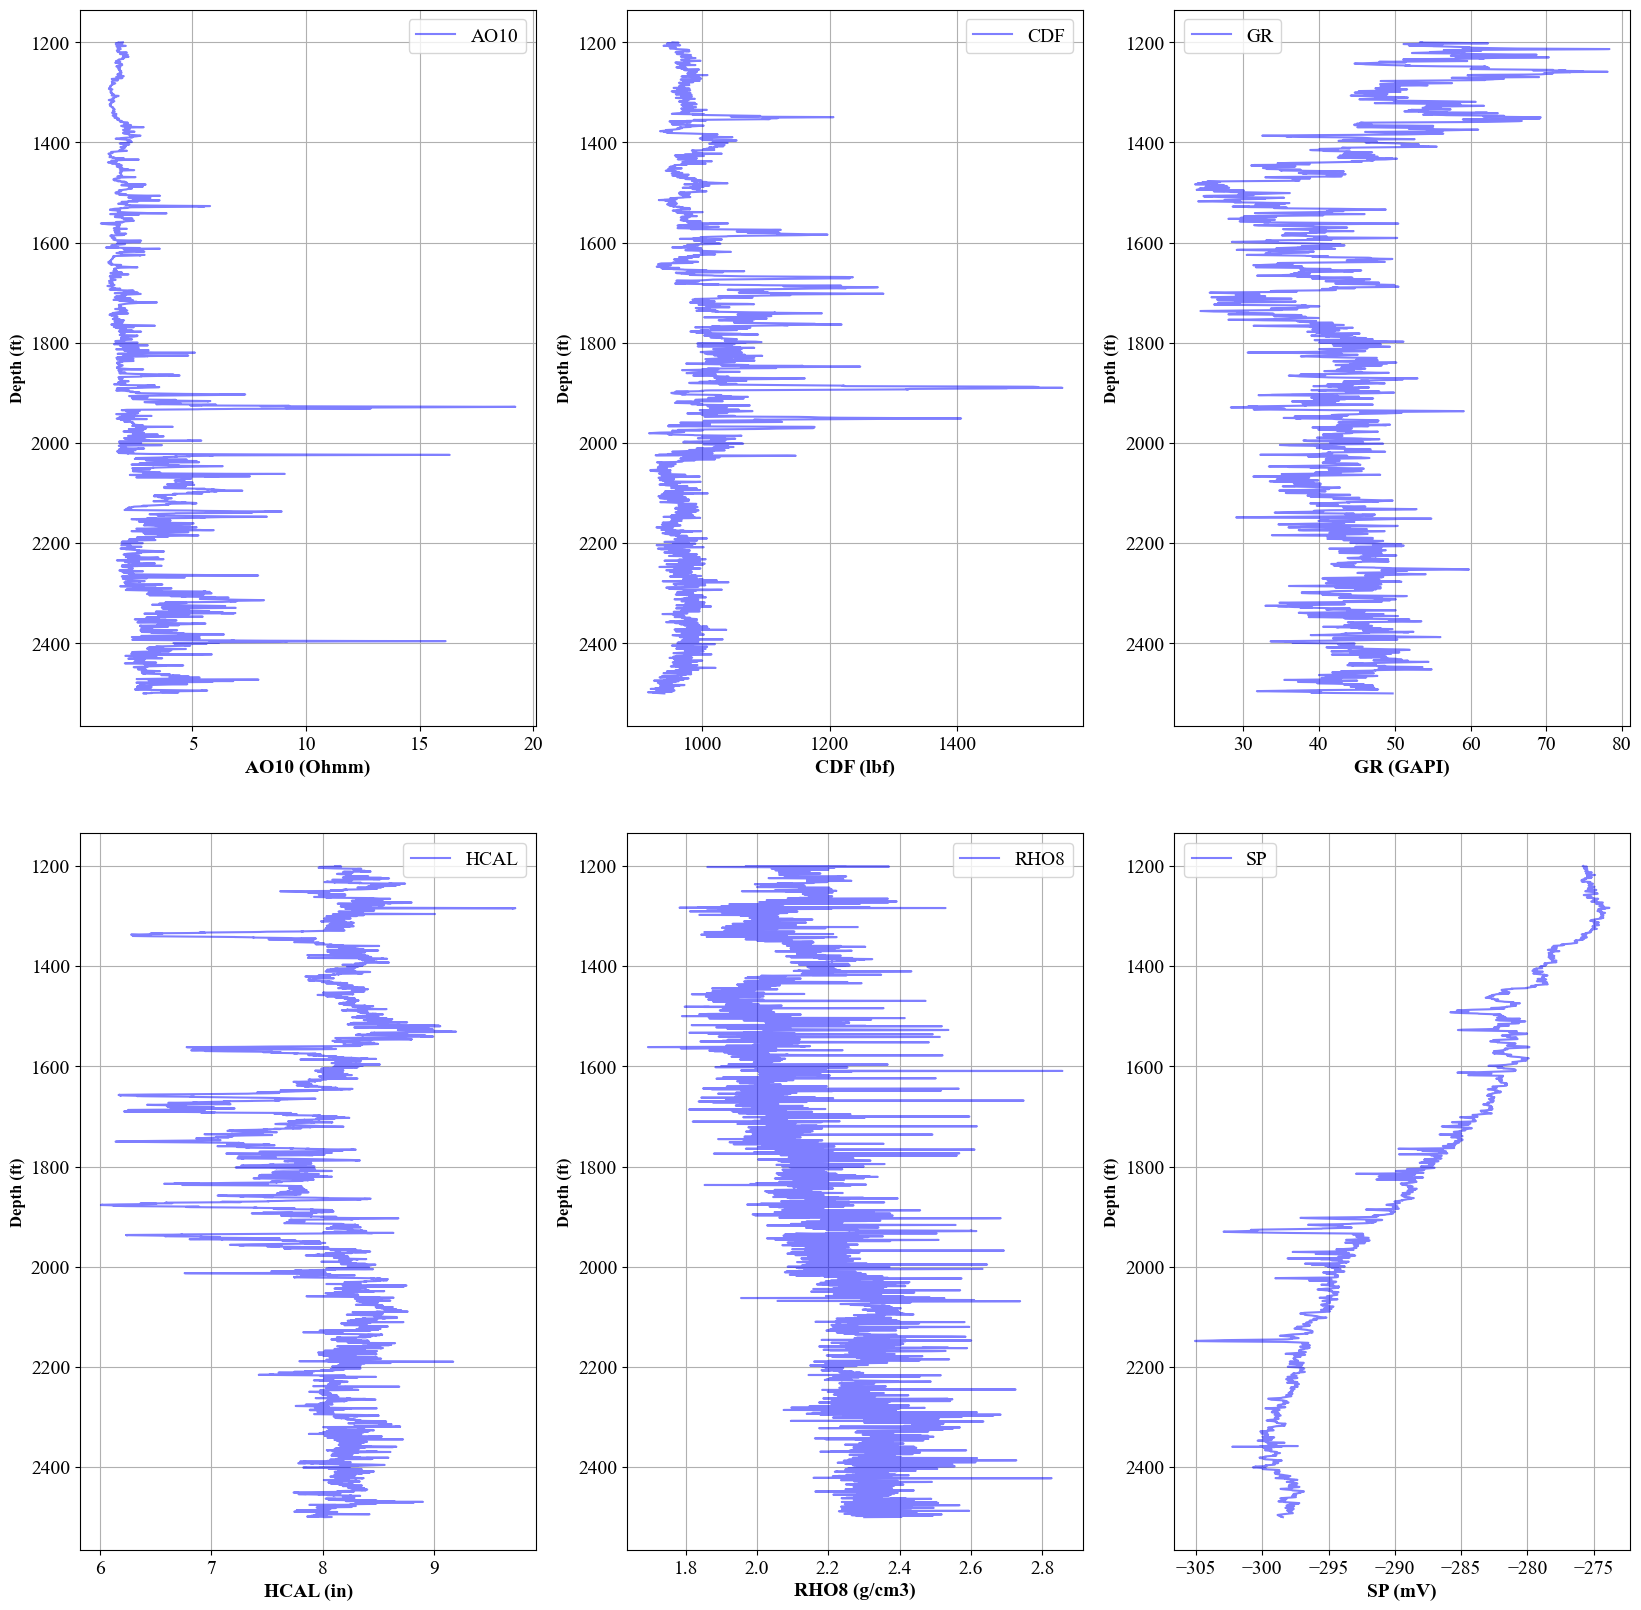

In [8]:
###usefulProperties = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

namesRemain = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
units = {'AO10':'Ohmm', 'CDF':'lbf', 'GR':'GAPI', 'HCAL':'in', 'RHO8':'g/cm3', 'SP':'mV'}

plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, ax in enumerate(axes):
    nm = namesRemain[i]
    ax.plot(currambaData_filteredDeep[nm], currambaData_filteredDeep['DEPT'], label = f'{nm}', color = 'blue', alpha=0.5)

    ax.set_xlabel(f'{nm} ({units[nm]})', fontweight='bold', fontsize=14, fontname='Times New Roman')
    ax.set_ylabel('Depth (ft)', fontweight='bold', fontsize=12, fontname='Times New Roman')

    ax.tick_params(axis='both', labelsize=14) 
    
    ax.grid(True)
    ax.invert_yaxis()
    ax.legend(fontsize=14)

plt.subplots_adjust(hspace=0.15)  # Ajusta el espacio entre filas
plt.show()

## Normal deep | AO10 - CDF - GR - HCAL - RHO8 - SP

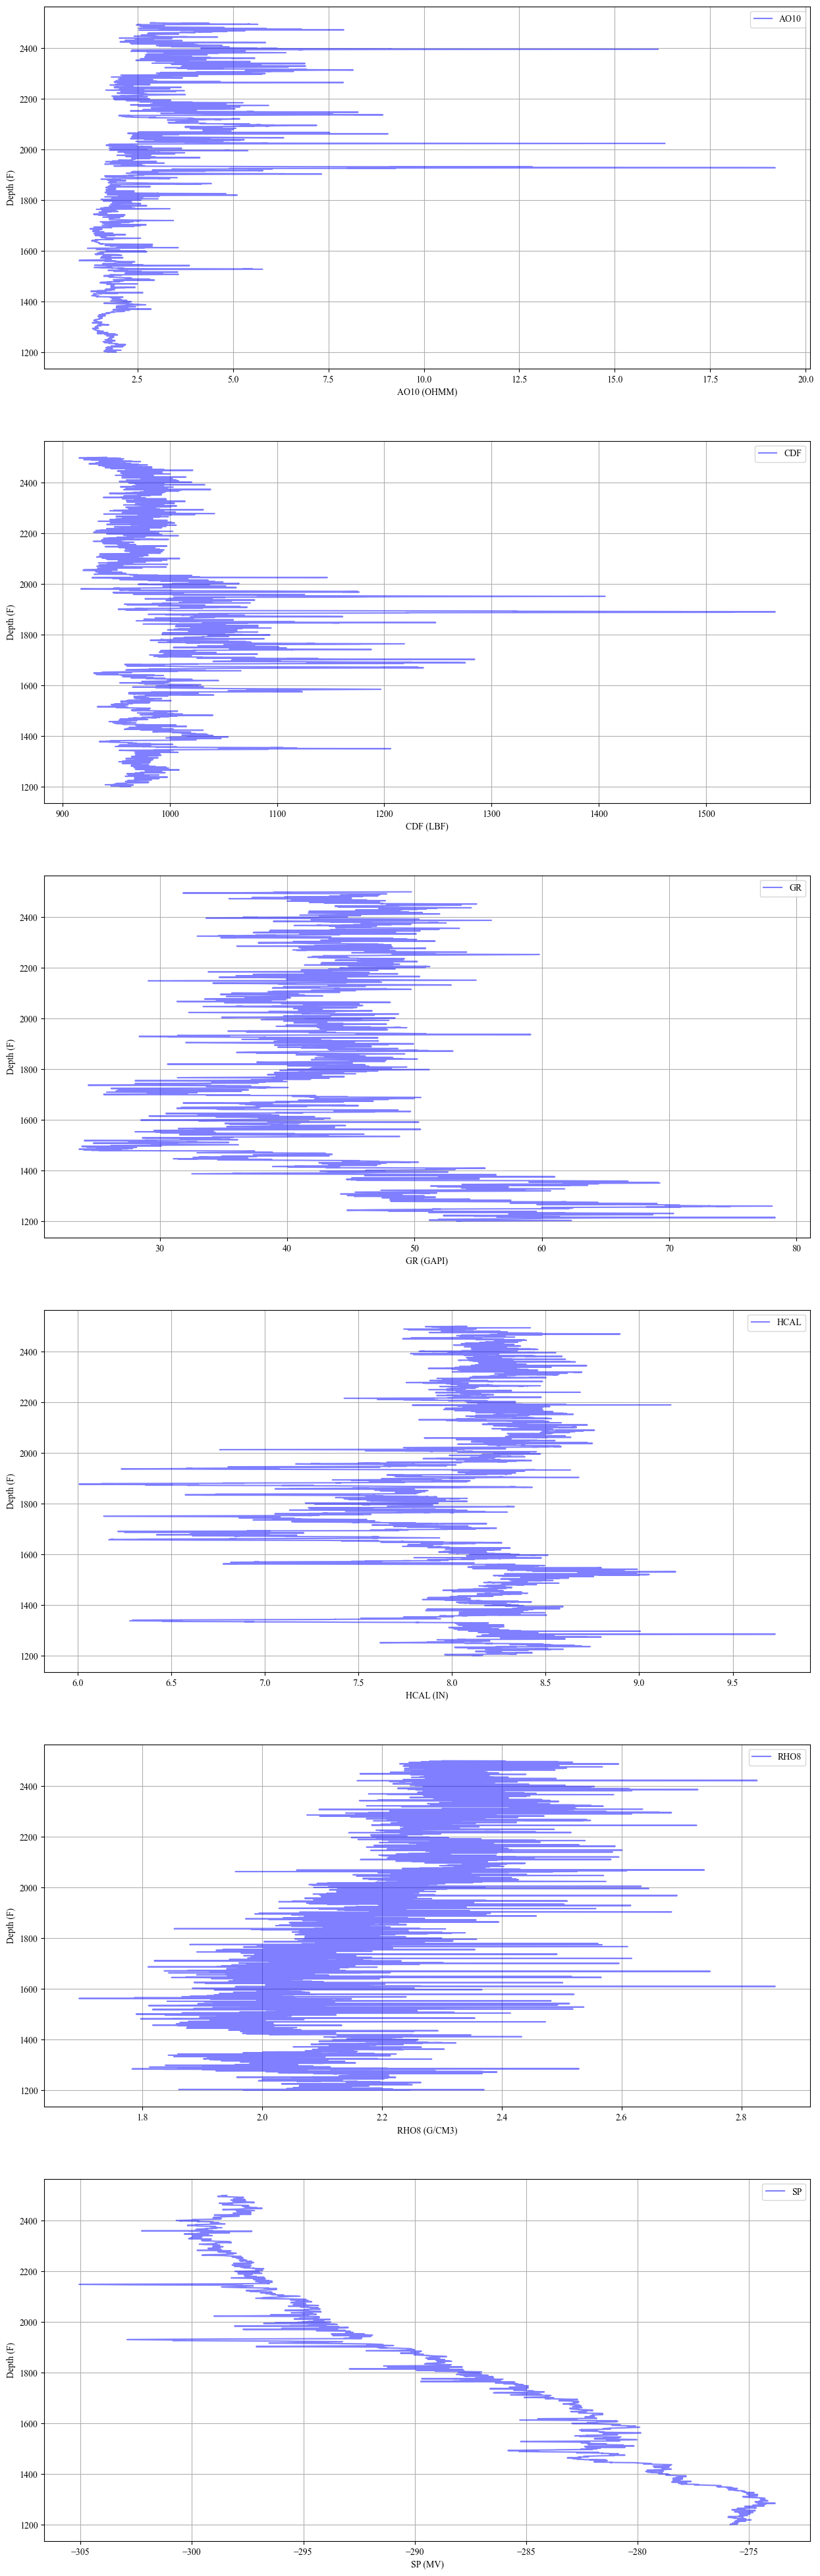

In [9]:
## Par X, Y
## np_positive_waveNumber_Prom , np_positive_amplitude_Prom
## np_positive_waveNumber_Std , np_positive_amplitude_Std

###usefulProperties = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

namesRemain = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 50))

for i, ax in enumerate(axes):
    nm = namesRemain[i]
    ax.plot(currambaData_filteredDeep[nm], currambaData_filteredDeep['DEPT'], label = f'{nm}', color = 'blue', alpha=0.5)
    ax.set_xlabel(f'{nm} ({units[nm]})')
    ax.set_ylabel('Depth (F)')
    ax.grid(True)
    ax.legend()

# Fourier Transform

In [10]:
## usefulProperties = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
# np_currambaData_filteredDeep

usefulProperties_2 = ['DEPT', 'AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
np_currambaData_filteredDeep_2 = currambaData_filteredDeep[usefulProperties_2].to_numpy()

deep = np_currambaData_filteredDeep_2[:, 0]
delta_deep = np.mean(np.diff(deep))  ## Data spacing 

l_positive_waveNumber, l_positive_amplitude, l_positive_waveLength = list(), list(), list()

#print(np_currambaData_filteredDeep_2.shape)
for i, prop in enumerate(np_currambaData_filteredDeep_2.T):
    if i > 0:
        propertyy = usefulProperties_2[i]
        
        fourier_transform = fft(prop)
        waveNumber = fftfreq(len(prop), delta_deep)

        positive_waveNumber = waveNumber[:len(waveNumber) // 2]  ### UNIDAD: 1/ft
        positive_amplitude = np.abs(fourier_transform[:len(fourier_transform) // 2])

        positive_waveLength = np.where(positive_waveNumber == 0, 0, 1 / positive_waveNumber) ### UNIDAD: ft
        
        #print(positive_waveNumber.shape)
        #print(positive_waveLength)

        l_positive_waveNumber.append(positive_waveNumber)
        l_positive_amplitude.append(positive_amplitude)
        l_positive_waveLength.append(positive_waveLength)
        
    else:
        continue

### To transform List to Np
np_positive_waveNumber = np.vstack(l_positive_waveNumber)
np_positive_amplitude = np.vstack(l_positive_amplitude)
np_positive_waveLength = np.vstack(l_positive_waveLength)

C:\Users\moise\AppData\Local\Temp\ipykernel_20164\2261313392.py:23: RuntimeWarning: divide by zero encountered in divide
  positive_waveLength = np.where(positive_waveNumber == 0, 0, 1 / positive_waveNumber) ### UNIDAD: ft


In [11]:
def graph_prom_std(x, y, w):

    if len(x) != len(y):
        raise ValueError('X and Y must have the same length!!!')

    else:

        prom_x, std_x, prom_y, std_y = list(), list(), list(), list()

        limite = len(x)-(len(x) % w)
        
        for i in range(1, limite, w):
            x_window = x[i:i + w]
            y_window = y[i:i + w]
            prom_x.append(np.mean(x_window))
            std_x.append(np.std(x_window))
            prom_y.append(np.mean(y_window))
            std_y.append(np.std(y_window))
    
    return prom_x, std_x, prom_y, std_y

In [12]:
#np_positive_waveNumber
#np_positive_amplitude
#np_positive_waveLength

usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

window = 10
l_positive_waveNumber_Prom, l_positive_amplitude_Prom, l_positive_waveLength_Prom = list(), list(), list()
l_positive_waveNumber_Std, l_positive_amplitude_Std, l_positive_waveLength_Std = list(), list(), list()

for i, (waveNumber, amplitude, waveLength) in enumerate(zip(np_positive_waveNumber, np_positive_amplitude, np_positive_waveLength)):
    propertyy = usefulProperties_fft[i]
    
    prom_x, std_x, prom_y, std_y = graph_prom_std(waveNumber, amplitude, window)

    l_positive_waveNumber_Prom.append(prom_x), l_positive_amplitude_Prom.append(prom_y)
    l_positive_waveNumber_Std.append(std_x), l_positive_amplitude_Std.append(std_y)


    prom_x, std_x, prom_y, std_y = graph_prom_std(waveLength, amplitude, window)
    l_positive_waveLength_Prom.append(prom_x), l_positive_waveLength_Std.append(waveLength)

np_positive_waveNumber_Prom = np.vstack(l_positive_waveNumber_Prom)
np_positive_amplitude_Prom = np.vstack(l_positive_amplitude_Prom)
np_positive_waveLength_Prom = np.vstack(l_positive_waveLength_Prom)

np_positive_waveNumber_Std = np.vstack(l_positive_waveNumber_Std)
np_positive_amplitude_Std = np.vstack(l_positive_amplitude_Std)
np_positive_waveLength_Std = np.vstack(l_positive_waveLength_Std)

## AO10 - CDF - GR - HCAL - RHO8 - SP

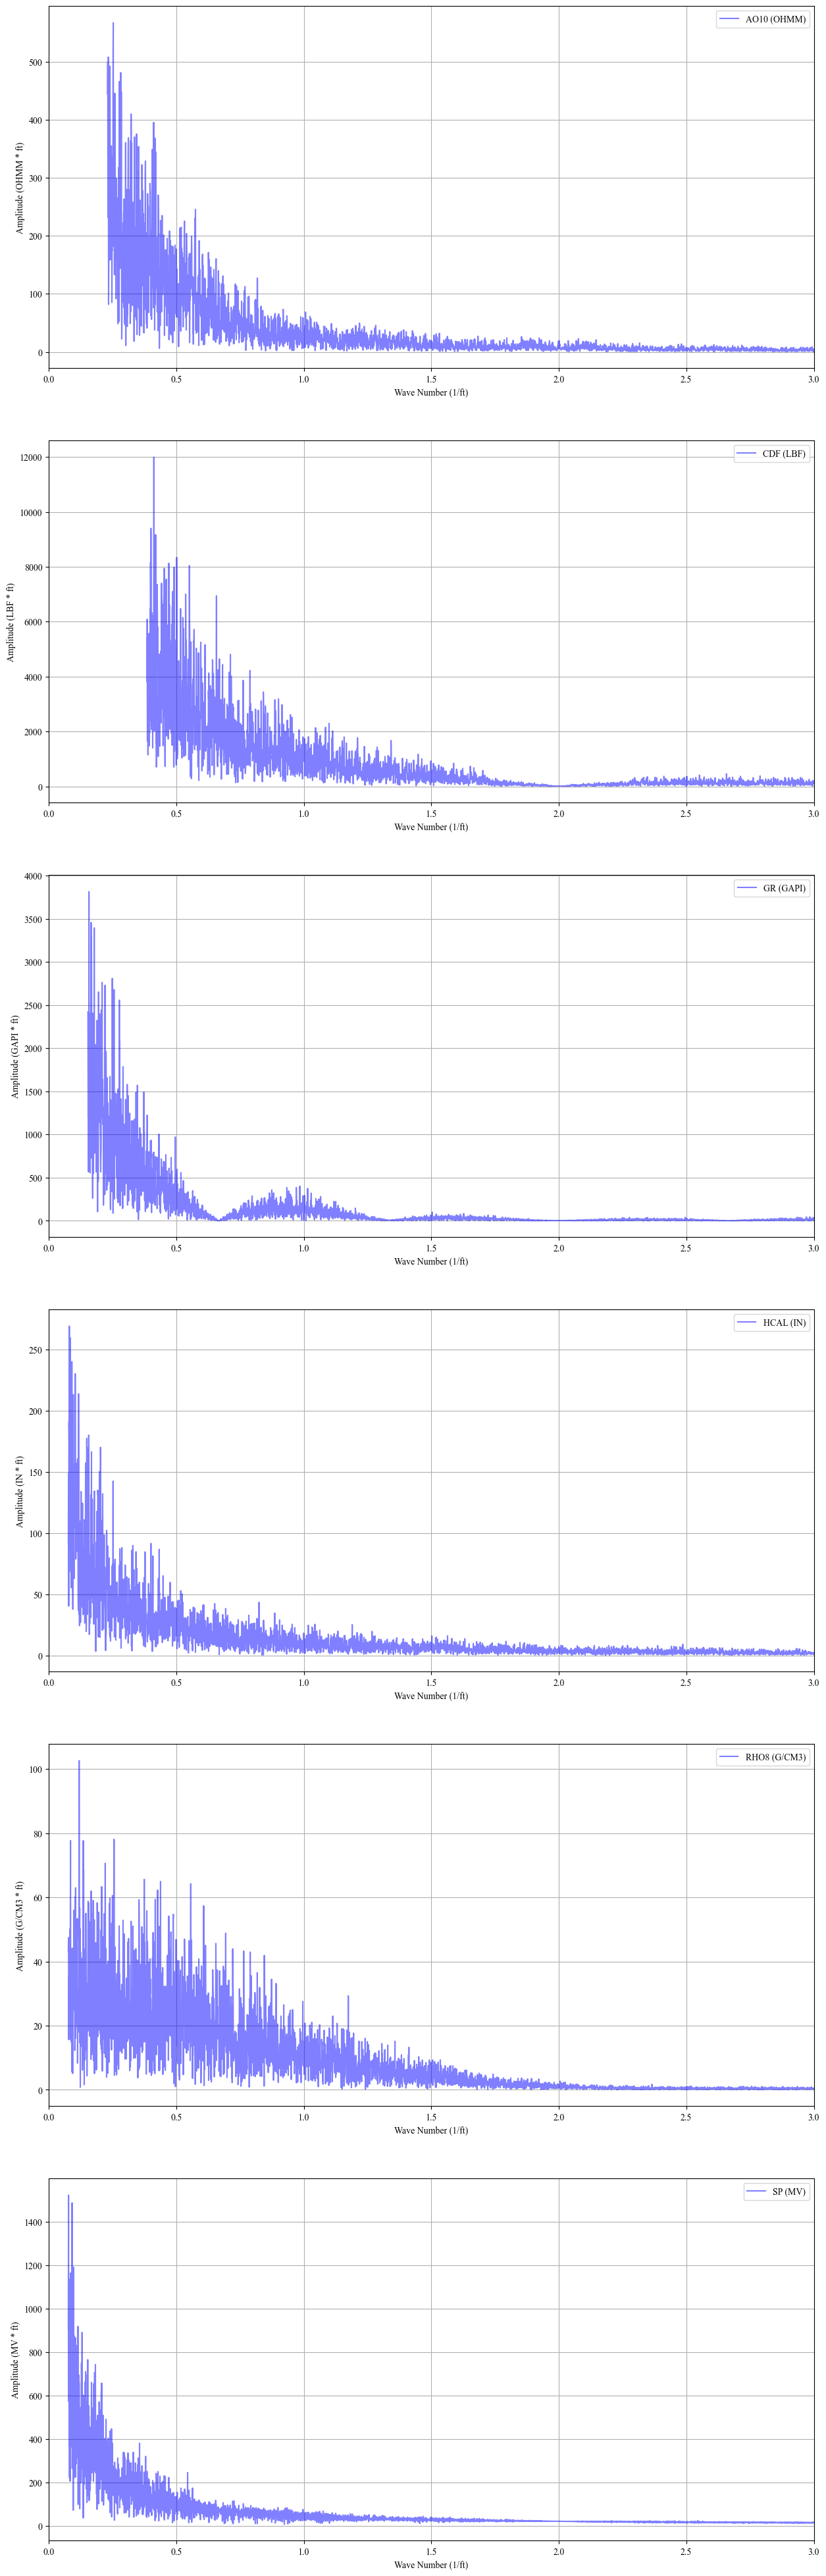

In [13]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
sectionCut = {'AO10': 300, 'CDF': 500, 'GR': 200, 'HCAL': 100, 'RHO8': 100, 'SP': 100} ## limits on the plot
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 50))

for i, ax in enumerate(axes):
    propertyy = usefulProperties_fft[i]
    xData = np_positive_waveNumber[i, sectionCut[propertyy]:]
    yData = np_positive_amplitude[i, sectionCut[propertyy]:]
    
    ax.plot(xData, yData, label = f'{propertyy} ({units[propertyy]})', color = 'blue', alpha=0.5)
    ax.set_ylabel(f'Amplitude ({units[propertyy]} * ft)')
    ax.set_xlabel(f'Wave Number (1/ft)')
    ax.set_xlim(0,3)
    ax.grid(True)
    ax.legend()

## Filter

### Average - Wave Number

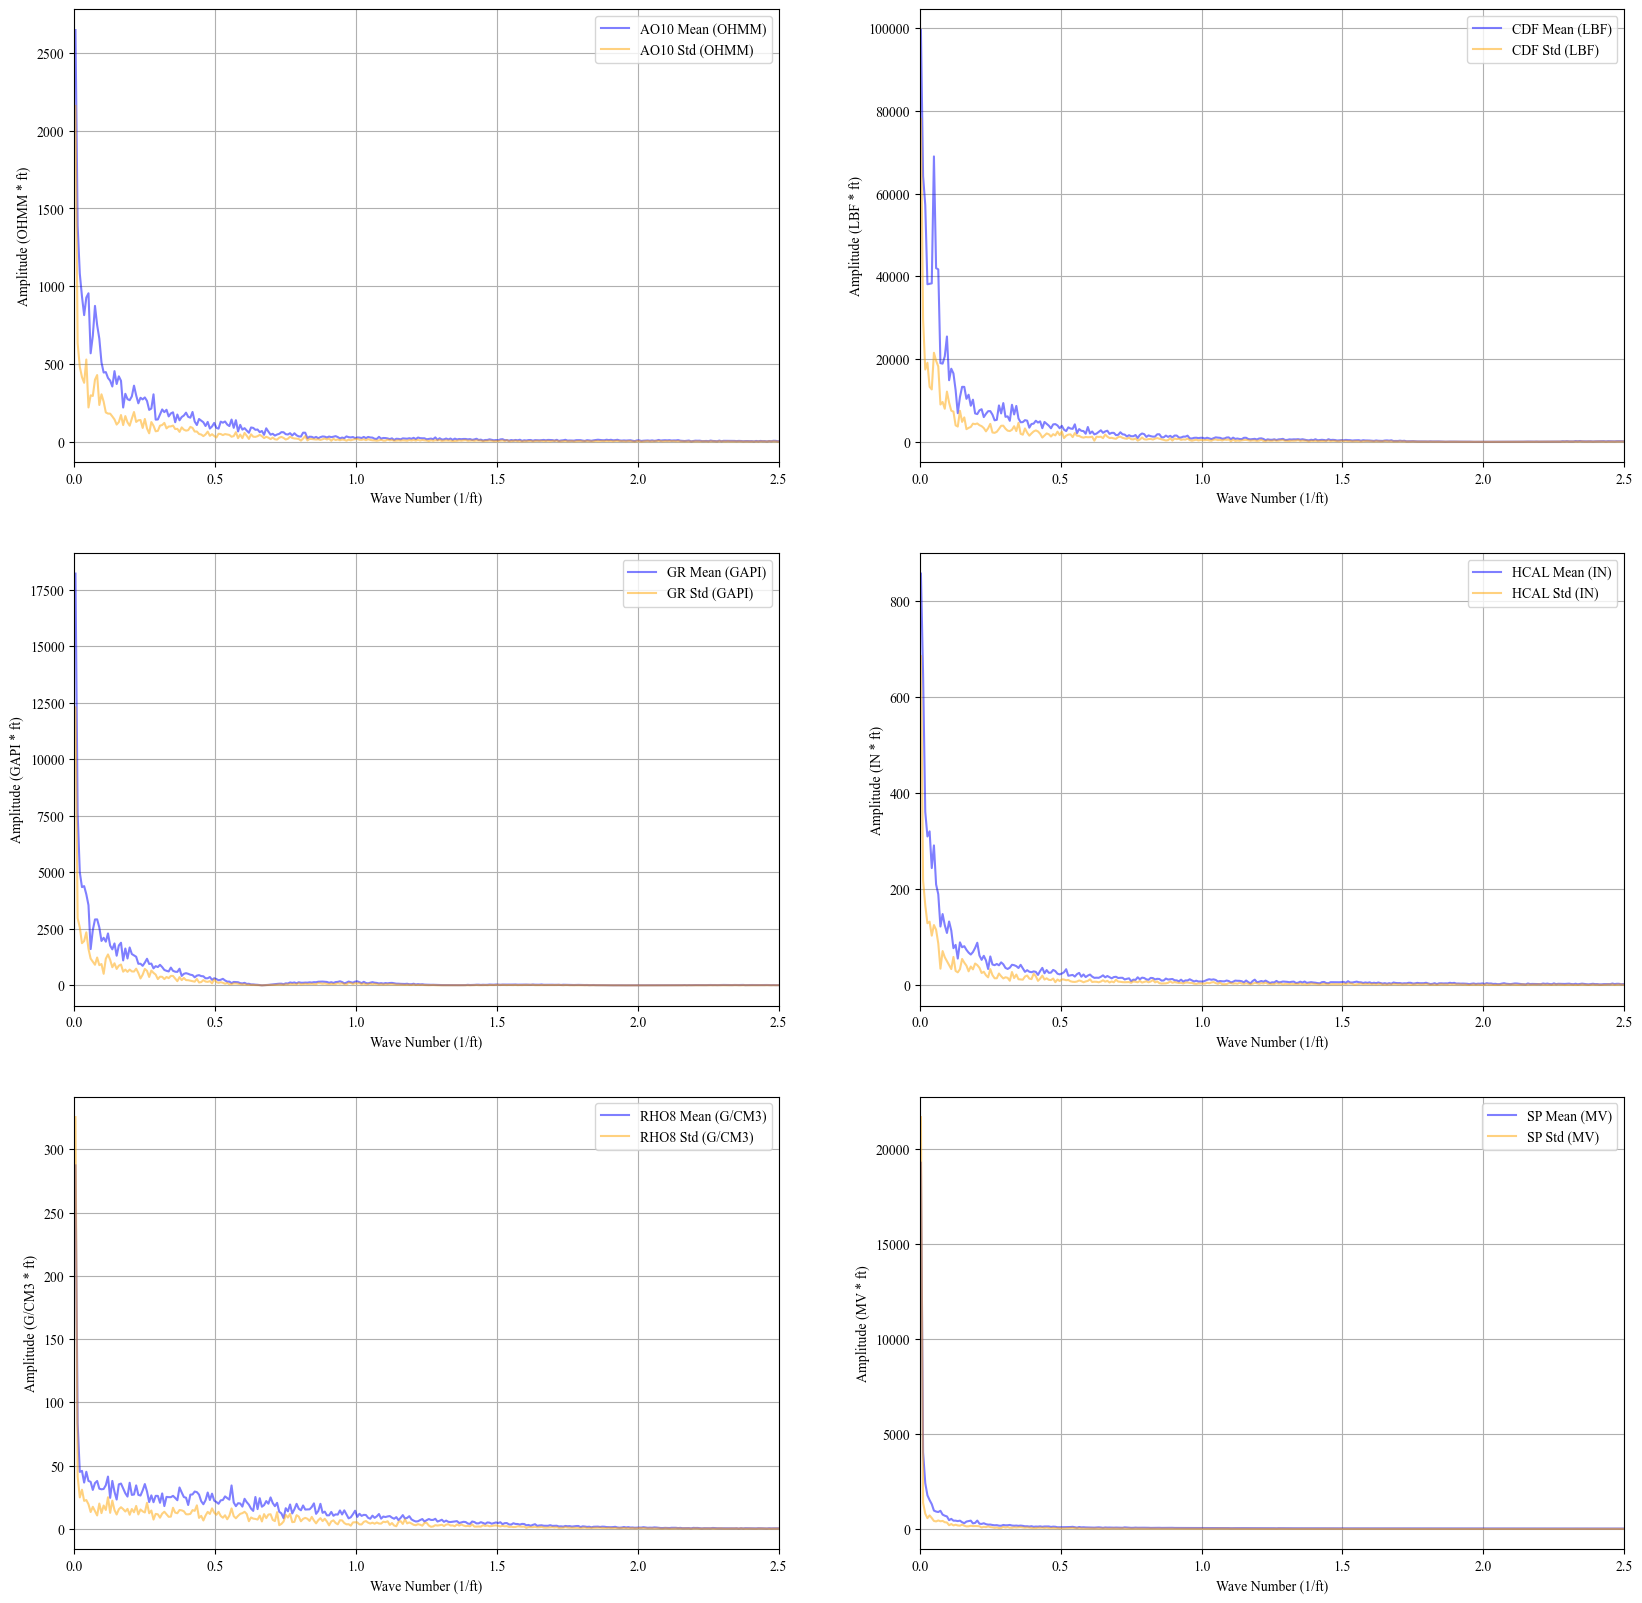

In [14]:
## Par X, Y
## np_positive_waveNumber_Prom , np_positive_amplitude_Prom   |   np_positive_waveLength_Prom
## np_positive_waveNumber_Std , np_positive_amplitude_Std   |   np_positive_waveLength_Std

usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}

#sectionCut = {'AO10': 20, 'CDF': 30, 'GR': 10, 'HCAL': 10, 'RHO8': 10, 'SP': 15} ## limits on the plot
sectionCut = {'AO10': 0, 'CDF': 0, 'GR': 0, 'HCAL': 0, 'RHO8': 0, 'SP': 0} ## limits on the plot



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para recorrerlos fácilmente

for i, ax in enumerate(axes):
    propertyy = usefulProperties_fft[i]
    xDataProm = np_positive_waveNumber_Prom[i, sectionCut[propertyy]:]
    yDataProm = np_positive_amplitude_Prom[i, sectionCut[propertyy]:]
    
    xDataStd = np_positive_waveNumber_Prom[i, sectionCut[propertyy]:]
    yDataStd = np_positive_amplitude_Std[i, sectionCut[propertyy]:]
    
    ax.plot(xDataProm, yDataProm, label = f'{propertyy} Mean ({units[propertyy]})', color = 'blue', alpha=0.5)
    ax.plot(xDataStd, yDataStd, label = f'{propertyy} Std ({units[propertyy]})', color = 'orange', alpha=0.5)

    ax.set_ylabel(f'Amplitude ({units[propertyy]} * ft)')
    ax.set_xlabel(f'Wave Number (1/ft)')
    ax.set_xlim(0,2.5)
    ax.grid(True)
    ax.legend()


### Normalized - WN

In [15]:
fft_AMP_Normalized_Prom = []

for i, value in enumerate(np_positive_amplitude_Prom):
    min_val = np.min(value)
    max_val = np.max(value)
        
    if max_val - min_val == 0:  # Evitar división por cero
        normalized = np.zeros_like(value)
    else:
        normalized = (value - min_val) / (max_val - min_val)
        
    fft_AMP_Normalized_Prom.append(normalized)

np_fft_AMP_Normalized_Prom = np.vstack(fft_AMP_Normalized_Prom)

In [16]:
fft_AMP_Normalized_Std = []

for i, value in enumerate(np_positive_amplitude_Std):
    min_val = np.min(value)
    max_val = np.max(value)
        
    if max_val - min_val == 0:  # Evitar división por cero
        normalized = np.zeros_like(value)
    else:
        normalized = (value - min_val) / (max_val - min_val)
        
    fft_AMP_Normalized_Std.append(normalized)

np_fft_AMP_Normalized_Std = np.vstack(fft_AMP_Normalized_Std)

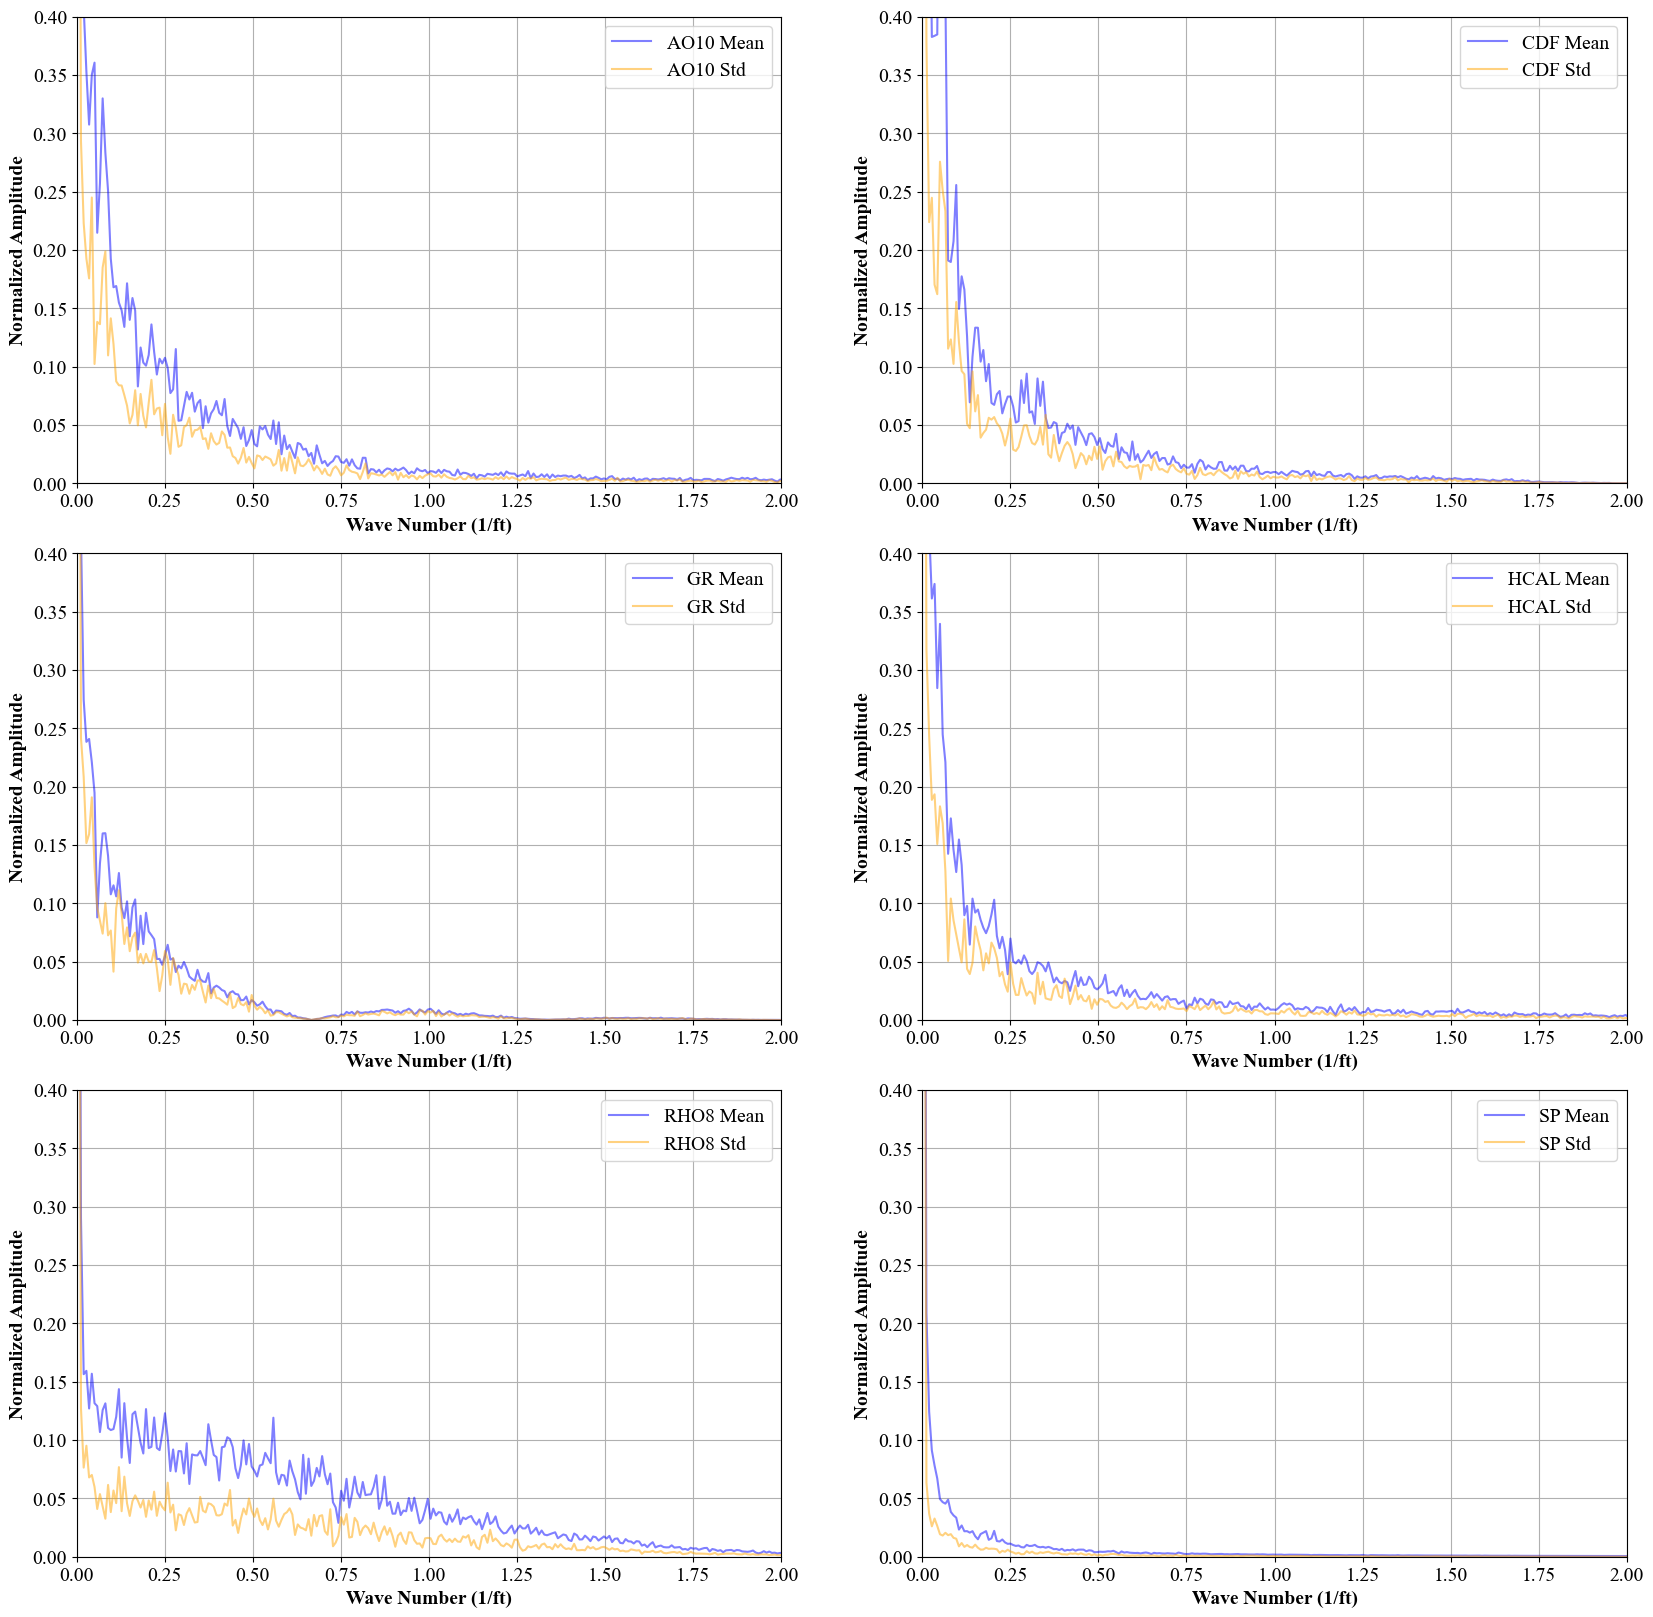

In [17]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}

#sectionCut = {'AO10': 20, 'CDF': 30, 'GR': 10, 'HCAL': 10, 'RHO8': 10, 'SP': 15} ## limits on the plot
sectionCut = {'AO10': 0, 'CDF': 0, 'GR': 0, 'HCAL': 0, 'RHO8': 0, 'SP': 0} ## limits on the plot

plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para recorrerlos fácilmente

for i, ax in enumerate(axes):
    propertyy = usefulProperties_fft[i]
    xDataProm = np_positive_waveNumber_Prom[i, sectionCut[propertyy]:]
    yDataProm = np_fft_AMP_Normalized_Prom[i, sectionCut[propertyy]:]
    
    xDataStd = np_positive_waveNumber_Prom[i, sectionCut[propertyy]:]
    yDataStd = np_fft_AMP_Normalized_Std[i, sectionCut[propertyy]:]
    
    ax.plot(xDataProm, yDataProm, label = f'{propertyy} Mean', color = 'blue', alpha=0.5)
    ax.plot(xDataStd, yDataStd, label = f'{propertyy} Std', color = 'orange', alpha=0.5)

    ax.set_ylabel(f'Normalized Amplitude', fontweight='bold', fontsize=14, fontname='Times New Roman')
    ax.set_xlabel(f'Wave Number (1/ft)', fontweight='bold', fontsize=14, fontname='Times New Roman')

    ax.tick_params(axis='both', labelsize=14)

    ax.set_ylim(0,0.4)
    ax.set_xlim(0,2)
    ax.grid(True)
    ax.legend(fontsize=14)

plt.subplots_adjust(hspace=0.15)  # Ajusta el espacio entre filas
plt.show()

### Average - Wave Length

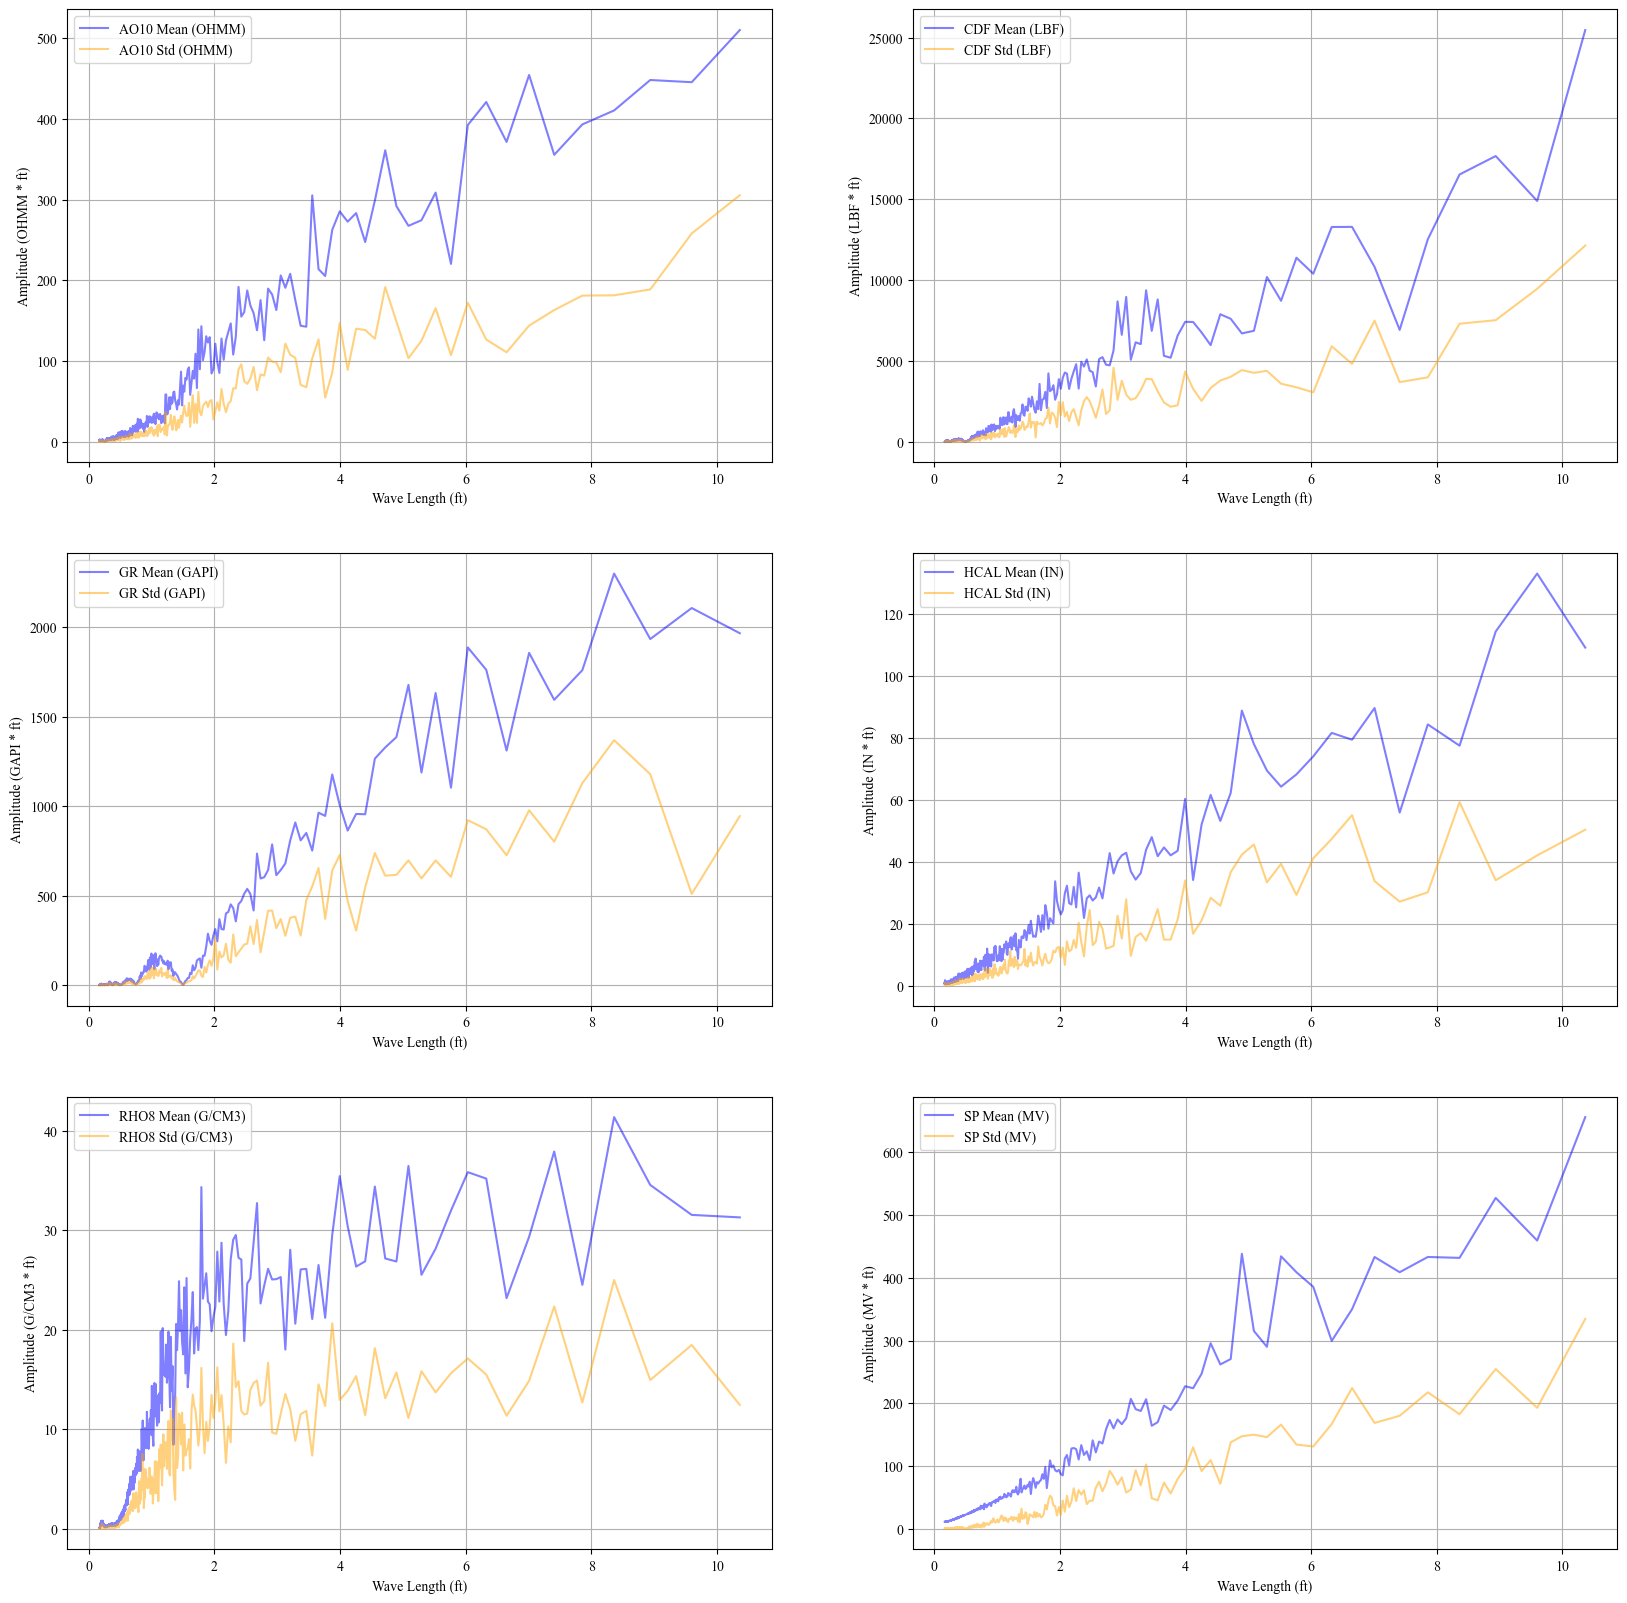

In [18]:
## Par X, Y
## np_positive_waveNumber_Prom , np_positive_amplitude_Prom   |   np_positive_waveLength_Prom
## np_positive_waveNumber_Std , np_positive_amplitude_Std   |   np_positive_waveLength_Std

usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}

sectionCut = {'AO10': 12, 'CDF': 12, 'GR': 12, 'HCAL': 12, 'RHO8': 12, 'SP': 12} ## limits on the plot


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para recorrerlos fácilmente


for i, ax in enumerate(axes):
    propertyy = usefulProperties_fft[i]
    xDataProm = np_positive_waveLength_Prom[i, sectionCut[propertyy]:]
    yDataProm = np_positive_amplitude_Prom[i, sectionCut[propertyy]:]
    
    xDataStd = np_positive_waveLength_Prom[i, sectionCut[propertyy]:]
    yDataStd = np_positive_amplitude_Std[i, sectionCut[propertyy]:]
    
    ax.plot(xDataProm, yDataProm, label = f'{propertyy} Mean ({units[propertyy]})', color = 'blue', alpha=0.5)
    ax.plot(xDataStd, yDataStd, label = f'{propertyy} Std ({units[propertyy]})', color = 'orange', alpha=0.5)

    ax.set_ylabel(f'Amplitude ({units[propertyy]} * ft)')
    ax.set_xlabel(f'Wave Length (ft)')
    #ax.set_xlim(0,2.5)
    ax.grid(True)
    ax.legend()

### Normalized - WL

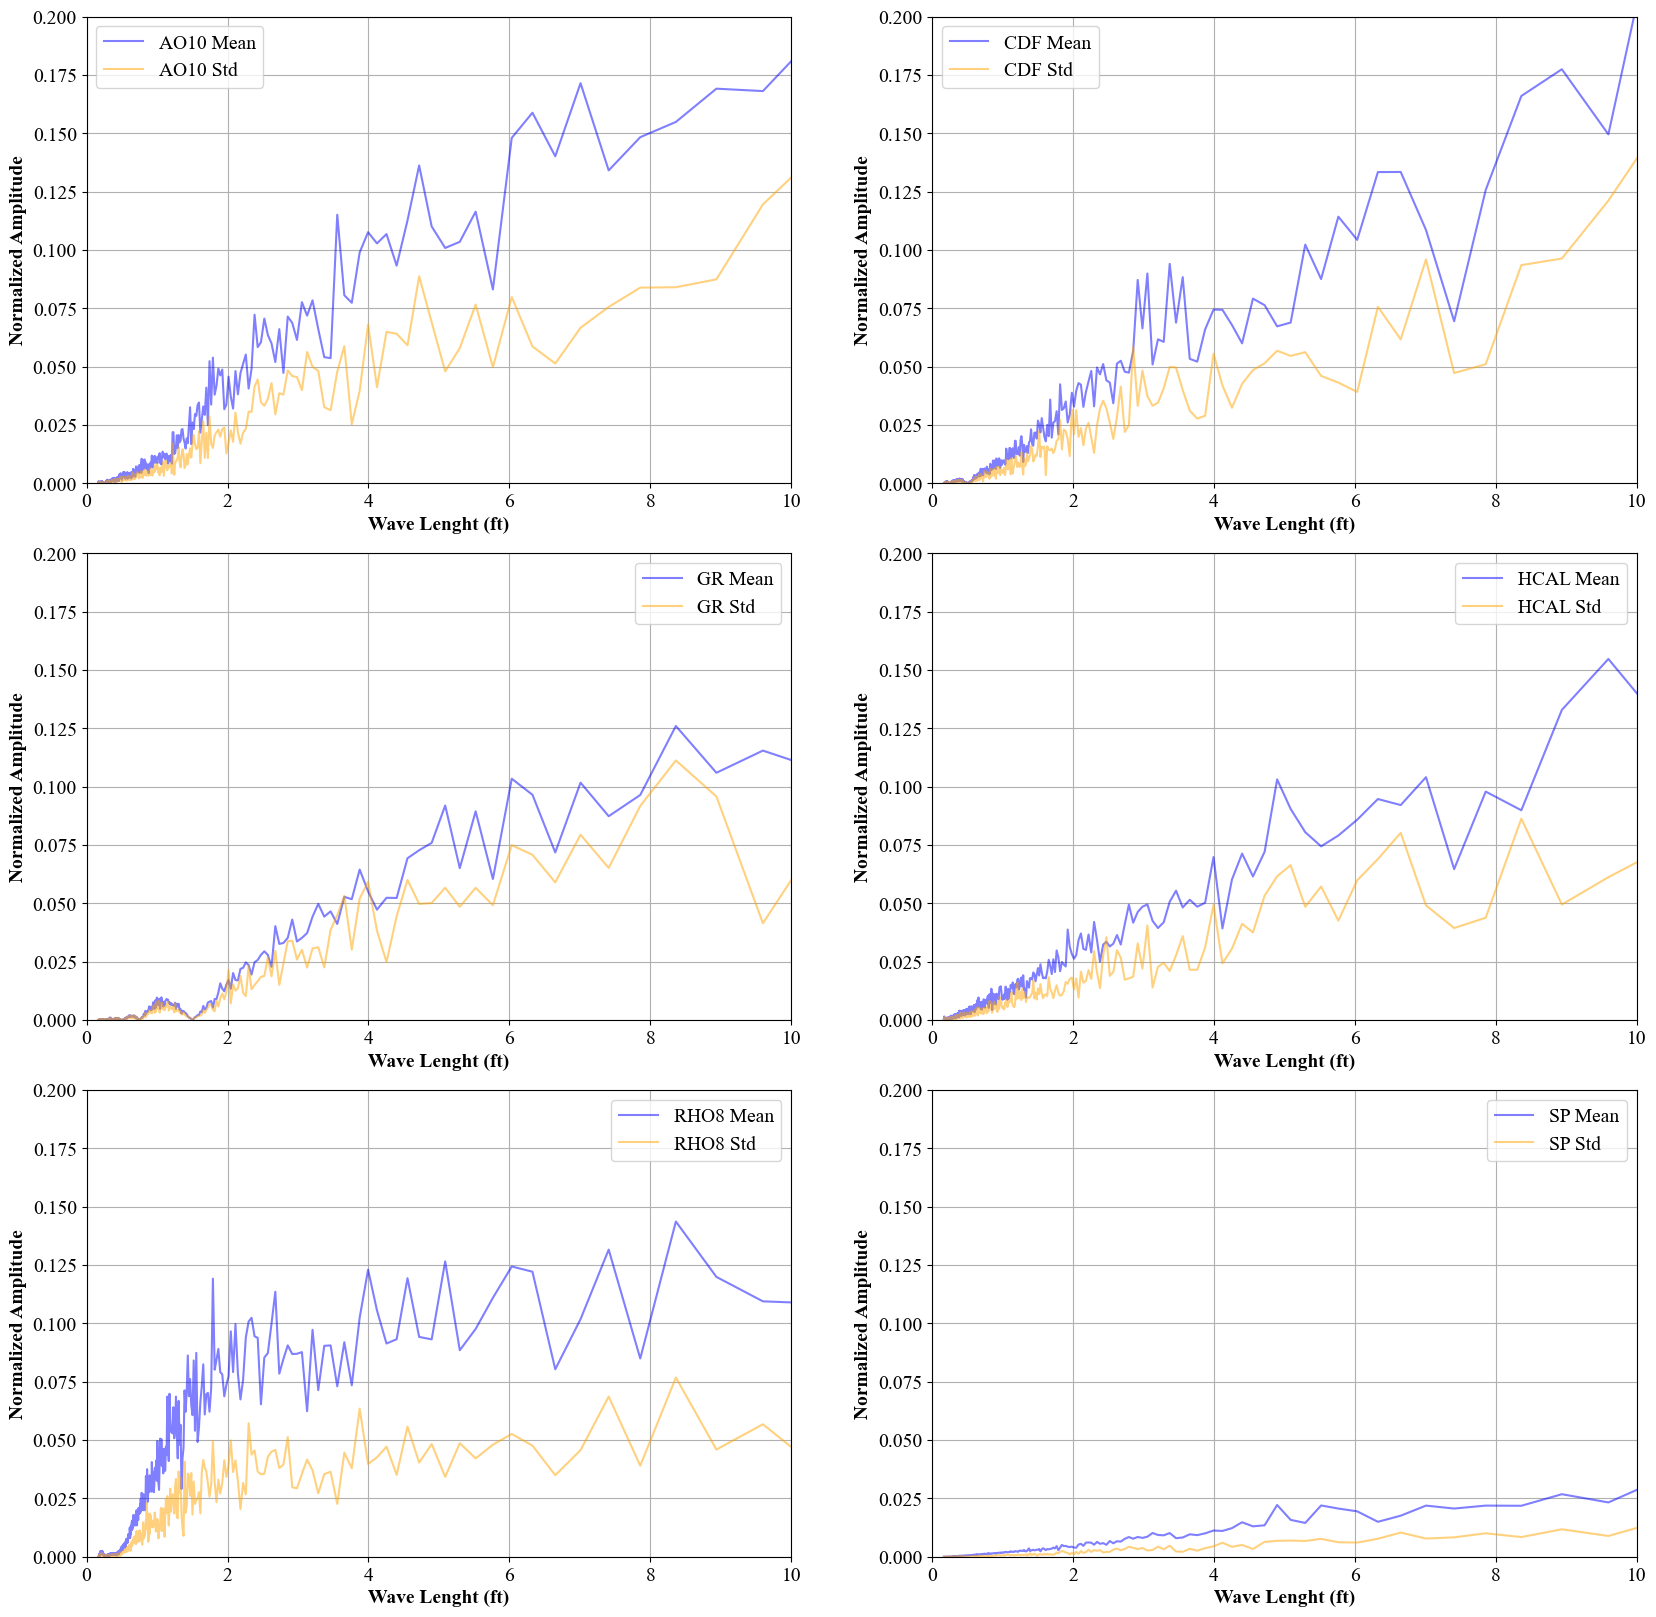

In [19]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}

#sectionCut = {'AO10': 0, 'CDF': 0, 'GR': 0, 'HCAL': 0, 'RHO8': 0, 'SP': 0} ## limits on the plot
sectionCut = {'AO10': 12, 'CDF': 12, 'GR': 12, 'HCAL': 12, 'RHO8': 12, 'SP': 12}

plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para recorrerlos fácilmente

for i, ax in enumerate(axes):
    propertyy = usefulProperties_fft[i]
    xDataProm = np_positive_waveLength_Prom[i, sectionCut[propertyy]:]
    yDataProm = np_fft_AMP_Normalized_Prom[i, sectionCut[propertyy]:]
    
    xDataStd = np_positive_waveLength_Prom[i, sectionCut[propertyy]:]
    yDataStd = np_fft_AMP_Normalized_Std[i, sectionCut[propertyy]:]

    ax.plot(xDataProm, yDataProm, label = f'{propertyy} Mean', color = 'blue', alpha=0.5)
    ax.plot(xDataStd, yDataStd, label = f'{propertyy} Std', color = 'orange', alpha=0.5)

    ax.set_ylabel(f'Normalized Amplitude', fontweight='bold', fontsize=14, fontname='Times New Roman')
    ax.set_xlabel(f'Wave Lenght (ft)', fontweight='bold', fontsize=14, fontname='Times New Roman')

    ax.tick_params(axis='both', labelsize=14)

    ax.set_ylim(0,0.2)
    ax.set_xlim(0,10)
    
    ax.grid(True)
    ax.legend(fontsize=14)

plt.subplots_adjust(hspace=0.15)  # Ajusta el espacio entre filas
plt.show()

# Normalized Data

## AO10 - CDF - GR - HCAL - RHO8 - SP

In [20]:
#np_currambaData_filteredDeep_2
usefulProperties_2 = ['DEPT', 'AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
xy_standardized = list()

for i, value in enumerate(np_currambaData_filteredDeep_2.T):
    if i == 0:
        xy_standardized.append(value)
    else:
        mean = np.mean(value)
        central = value - mean
        max_abs = np.max(np.abs(central))
        standardized = central/max_abs

        xy_standardized.append(standardized)

np_currambaData_filteredDeep_2standardized = np.vstack(xy_standardized)

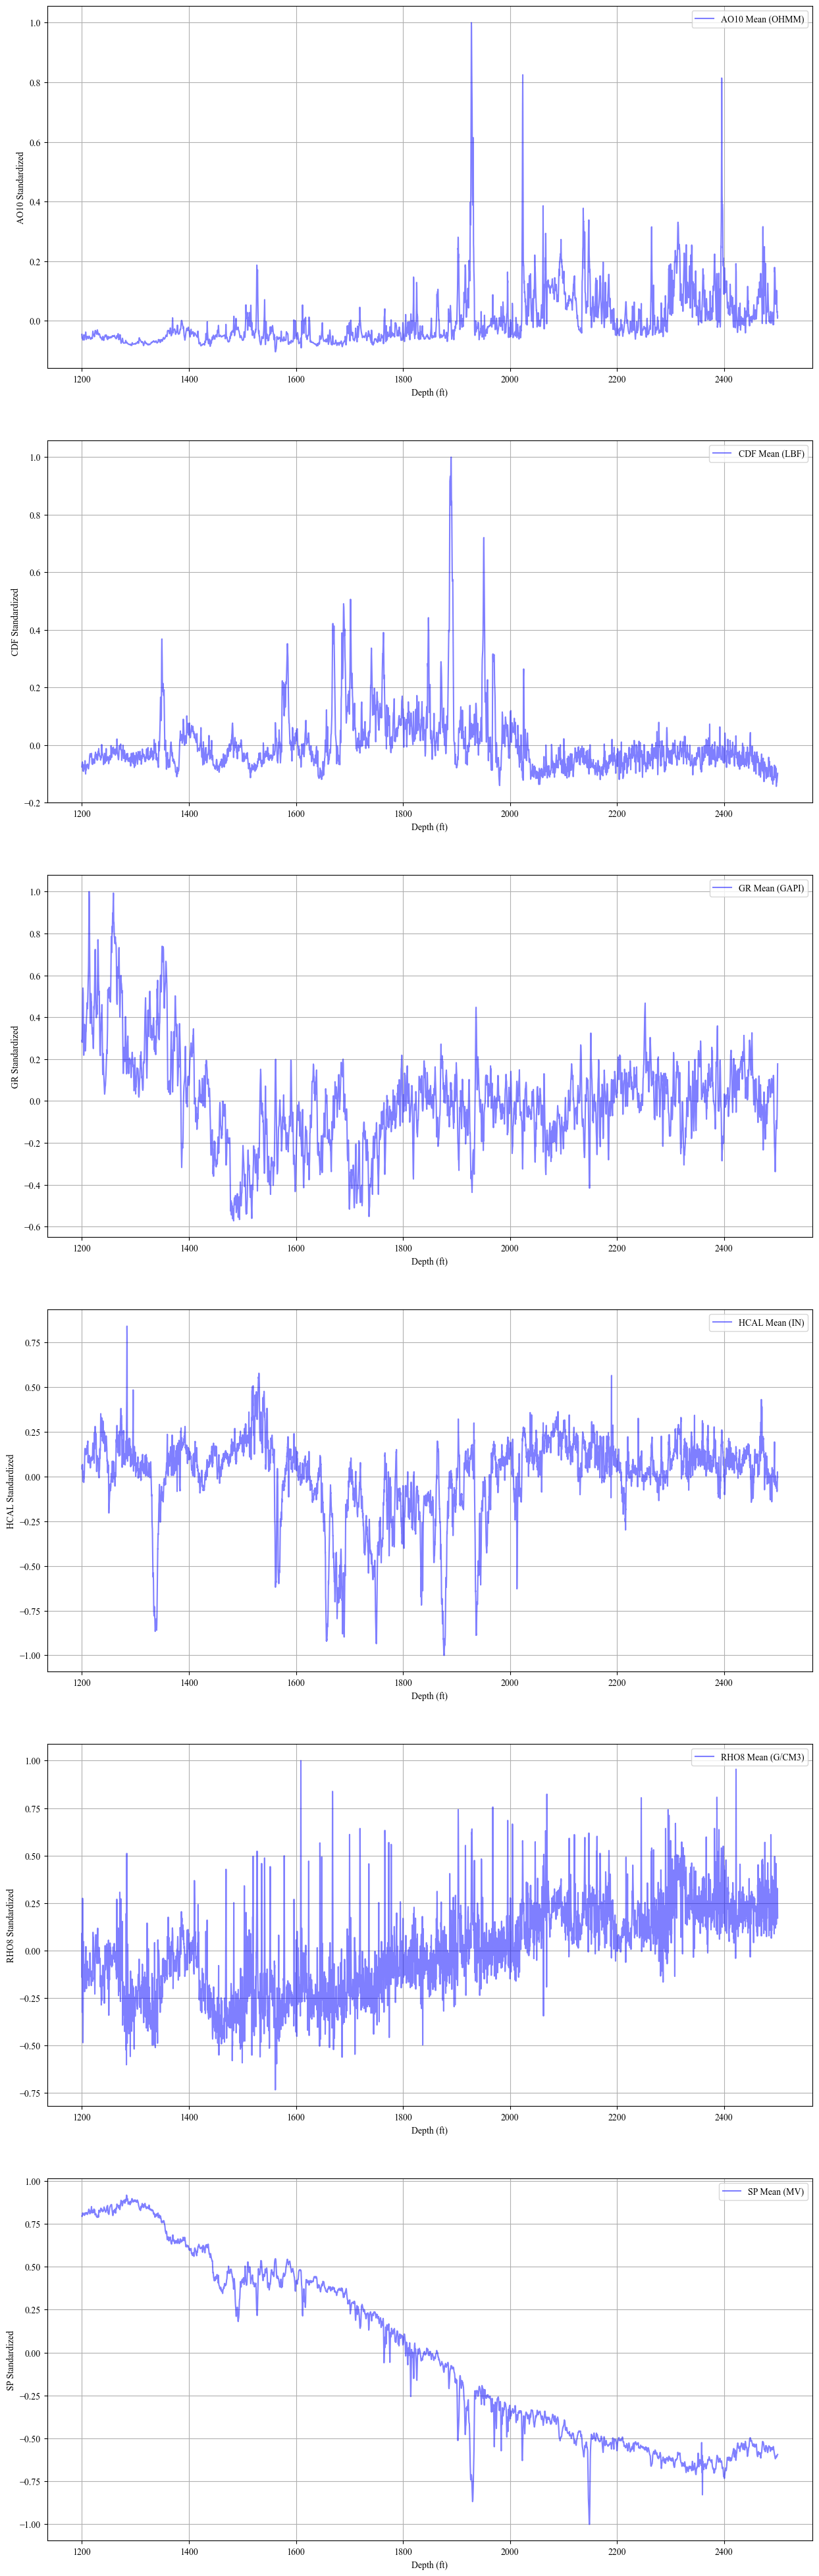

In [21]:
#np_currambaData_filteredDeep_2standarized
#usefulProperties_2 = ['DEPT', 'AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
sectionCut = {'AO10': 0, 'CDF': 0, 'GR': 0, 'HCAL': 0, 'RHO8': 0, 'SP': 0} ## limits on the plot
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 50))

for i, ax in enumerate(axes):
    propertyy = usefulProperties_fft[i]
    xData = np_currambaData_filteredDeep_2standardized[0, sectionCut[propertyy]:]
    yData = np_currambaData_filteredDeep_2standardized[i + 1, sectionCut[propertyy]:]

    ax.plot(xData, yData, label = f'{propertyy} Mean ({units[propertyy]})', color = 'blue', alpha=0.5)

    ax.set_ylabel(f'{propertyy} Standardized')
    ax.set_xlabel(f'Depth (ft)')
    #ax.set_xlim(0,2.5)
    ax.grid(True)
    ax.legend()

## AO COLOR

In [22]:
#np_currambaData_filteredDeep_AO = currambaData_filteredDeep[usefulProperties_AO].to_numpy()
usefulProperties_AO = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90']

xy_standardized_AOfull = list()

for i, value in enumerate(np_currambaData_filteredDeep_AO.T):
    if i == 0:
        xy_standardized_AOfull.append(value)
    else:
        mean = np.mean(value)
        central = value - mean
        max_abs = np.max(np.abs(central))
        standardized = central/max_abs

        xy_standardized_AOfull.append(standardized)

np_currambaData_filteredDeep_AOstandardized = np.vstack(xy_standardized_AOfull)

1
2
3
4
5


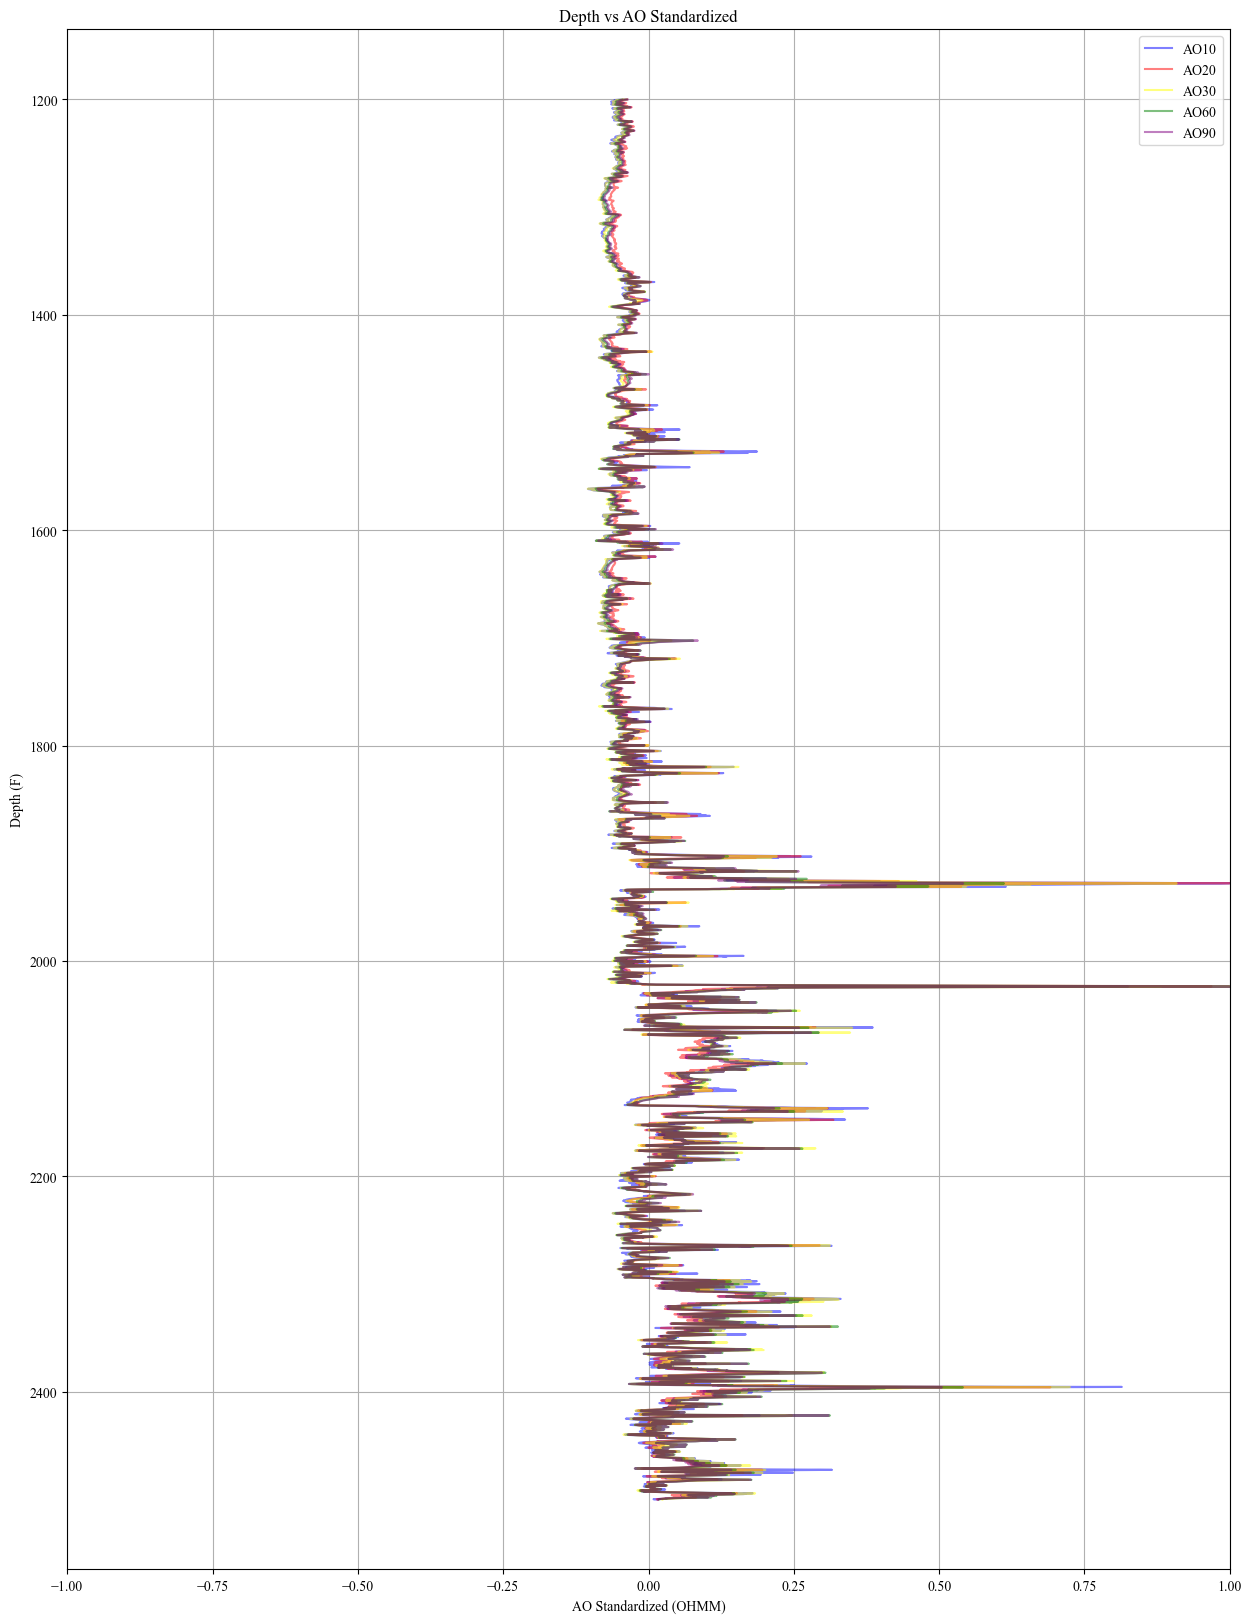

In [23]:
usefulProperties_AOfull = ['DEPT', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90']
namesAO = ['AO10', 'AO20', 'AO30', 'AO60', 'AO90']
colorAO = {'AO10': 'blue' , 'AO20': 'red', 'AO30': 'yellow', 'AO60':'green', 'AO90':'purple'}

plt.figure(figsize = (15,20))

for i, value in enumerate(np_currambaData_filteredDeep_AOstandardized):
    if i == 0:
        yData = np_currambaData_filteredDeep_AOstandardized[i]
        pass
    else:
        print(i)
        propertyy = usefulProperties_AOfull[i]
        xData = np_currambaData_filteredDeep_AOstandardized[i]

        plt.plot(xData, yData, label = propertyy, color = colorAO[propertyy], alpha = 0.5 )


plt.xlim(-1, 1)
plt.xlabel('AO Standardized (OHMM)')

plt.ylabel('Depth (F)')
#plt.ylim(1100, 2600)

plt.title('Depth vs AO Standardized')

plt.grid(True)
plt.legend()

plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la profundidad creciente hacia abajo
plt.show()

# Cross Correlation

## LAG - DATA

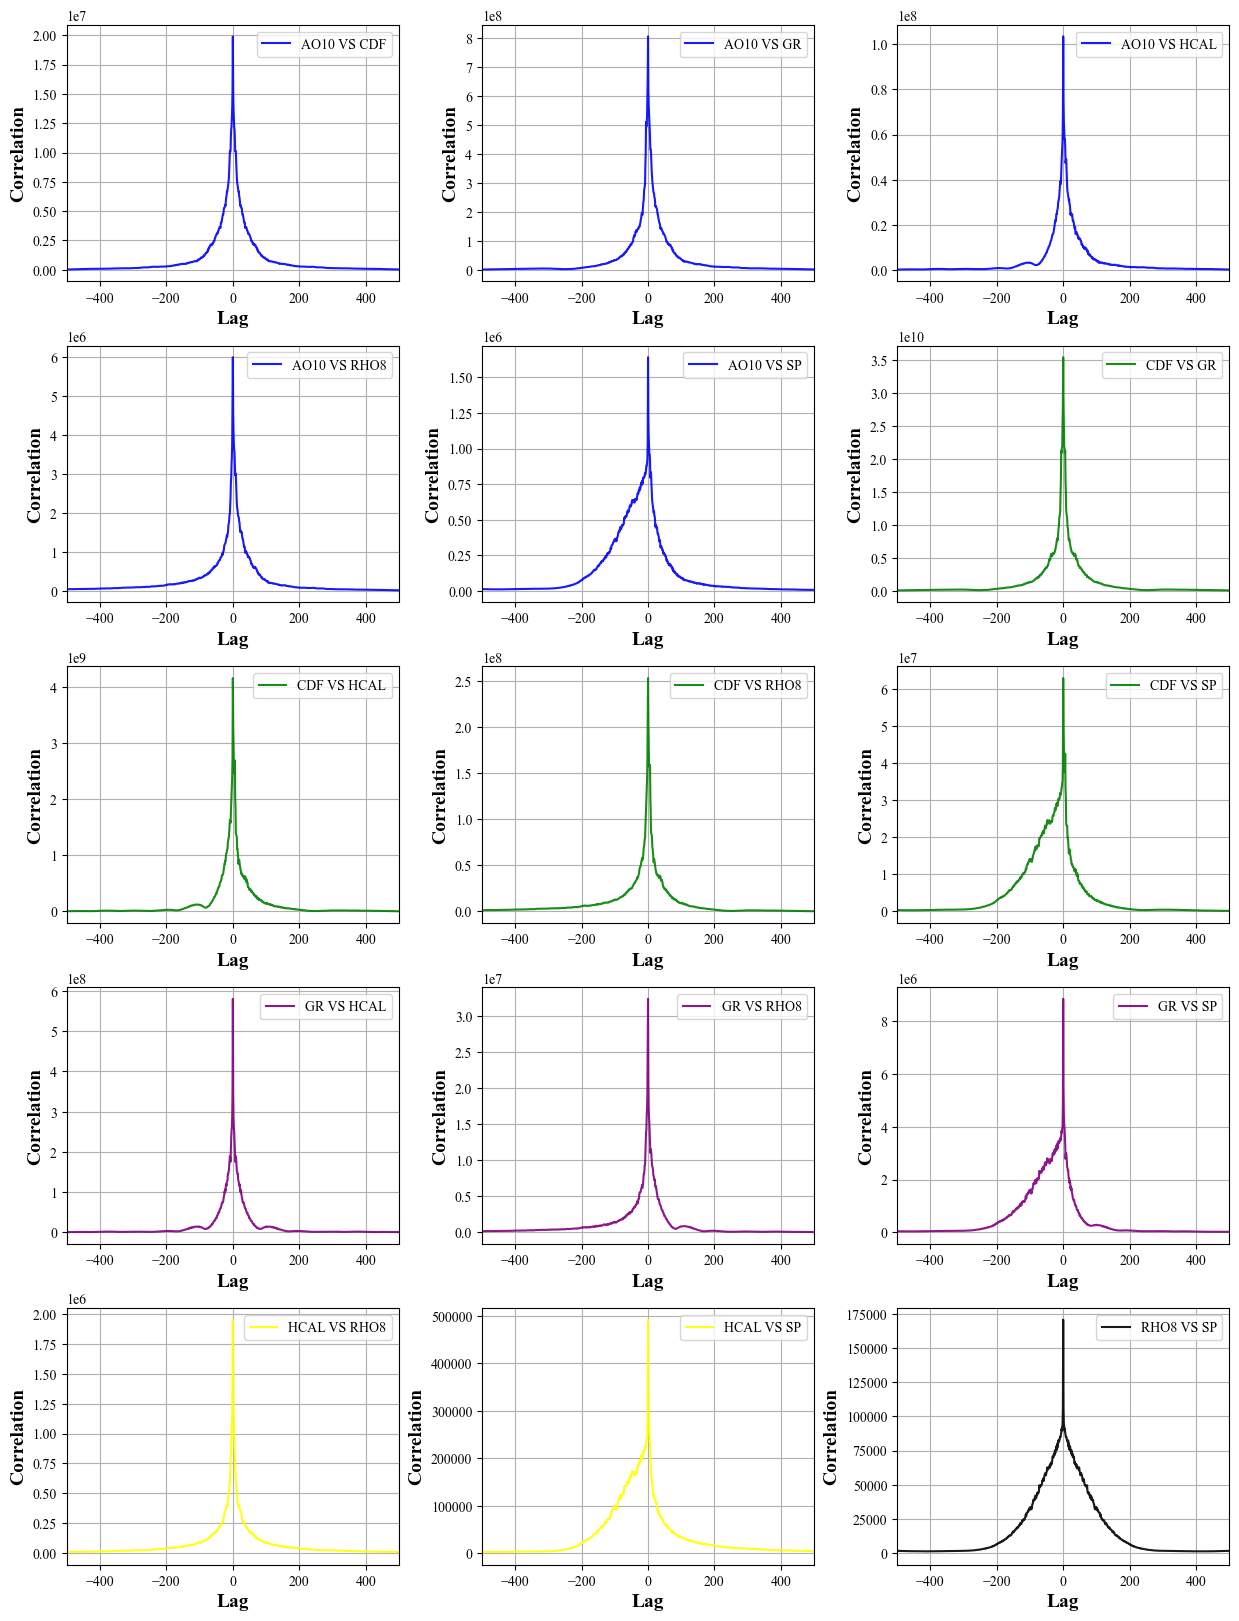

In [24]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
usefulProperties_fft_CC = ['CDF', 'GR', 'HCAL', 'RHO8', 'SP', 
                           'GR', 'HCAL', 'RHO8', 'SP', 
                           'HCAL', 'RHO8', 'SP',
                           'RHO8', 'SP',
                           'SP']
units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}
pos = {'AO10':0, 'CDF':1, 'GR':2, 'HCAL':3, 'RHO8':4, 'SP':5}
colorP = {'AO10':'blue', 'CDF':'green', 'GR':'purple', 'HCAL':'yellow', 'RHO8':'black', 'SP':'orange'}

plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 20))
axes = axes.flatten()

movil_1 = 0

for i, ax in enumerate(axes):
    
    movil_2 = pos[usefulProperties_fft_CC[i]] -1
    y1Data = np_positive_amplitude_Prom[movil_1]
    y2Data = np_positive_amplitude_Prom[movil_2]

    yCorrelation = np.correlate(y1Data, y2Data, mode='full')
    xCorrelation = np.arange(-len(y1Data) + 1, len(y2Data))

    ax.plot(xCorrelation, yCorrelation, label = f'{usefulProperties_fft[movil_1]} VS {usefulProperties_fft_CC[movil_2]}', color = colorP[usefulProperties_fft[movil_1]], alpha=0.9)

    ax.set_ylabel(f'Correlation', fontweight='bold', fontsize=14, fontname='Times New Roman')
    ax.set_xlabel(f'Lag', fontweight='bold', fontsize=14, fontname='Times New Roman')

    ax.tick_params(axis='both', labelsize=10)

    ax.set_xlim(-500, 500)

    ax.grid(True)
    ax.legend(fontsize=10)

    if i == 4 or i == 8 or i == 11 or i == 13:
        movil_1 = movil_1 + 1

plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

## LAG - NORMALIZED DATA

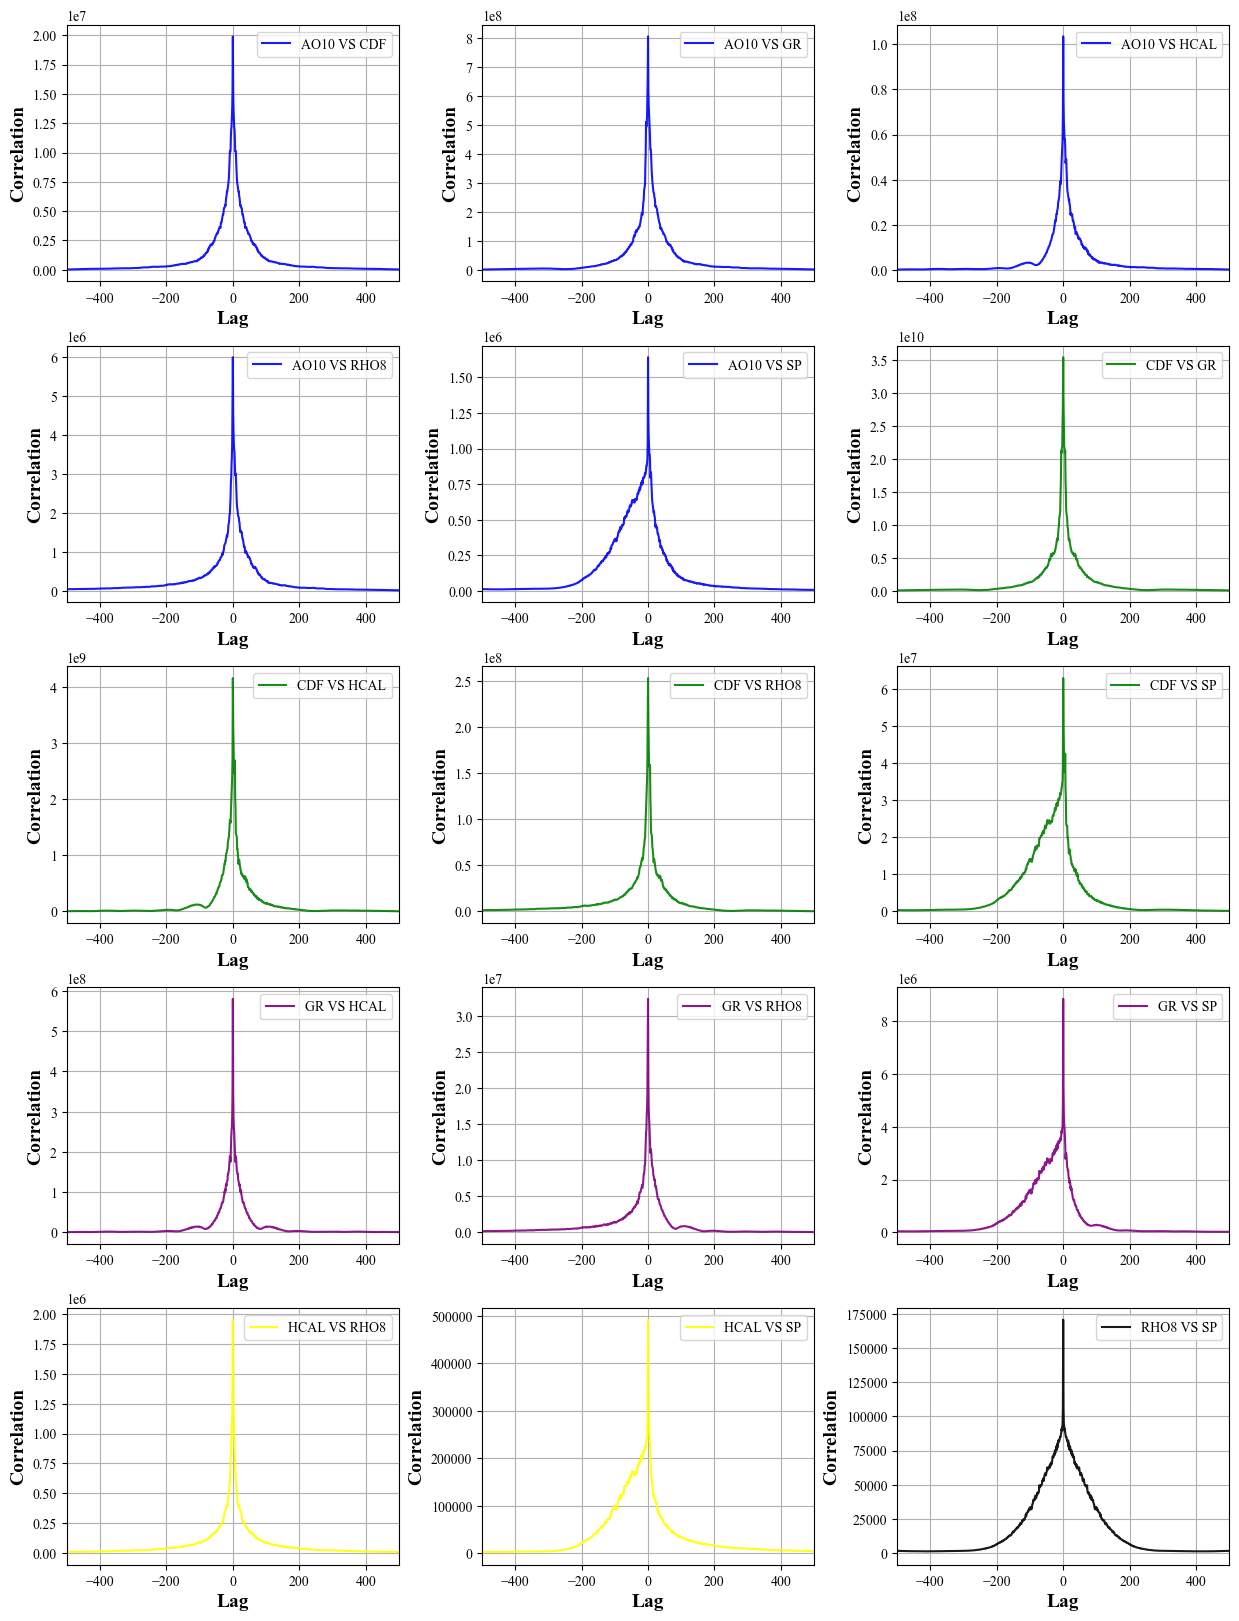

In [25]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 20))
axes = axes.flatten()

movil_1 = 0

for i, ax in enumerate(axes):
    
    movil_2 = pos[usefulProperties_fft_CC[i]] -1
    y1Data = np_positive_amplitude_Prom[movil_1]
    y2Data = np_positive_amplitude_Prom[movil_2]

    yCorrelation = np.correlate(y1Data, y2Data, mode='full')
    xCorrelation = np.arange(-len(y1Data) + 1, len(y2Data))

    ax.plot(xCorrelation, yCorrelation, label = f'{usefulProperties_fft[movil_1]} VS {usefulProperties_fft_CC[movil_2]}', color = colorP[usefulProperties_fft[movil_1]], alpha=0.9)

    ax.set_ylabel(f'Correlation', fontweight='bold', fontsize=14, fontname='Times New Roman')
    ax.set_xlabel(f'Lag', fontweight='bold', fontsize=14, fontname='Times New Roman')

    ax.tick_params(axis='both', labelsize=10)

    ax.set_xlim(-500, 500)

    ax.grid(True)
    ax.legend(fontsize=10)

    if i == 4 or i == 8 or i == 11 or i == 13:
        movil_1 = movil_1 + 1

plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

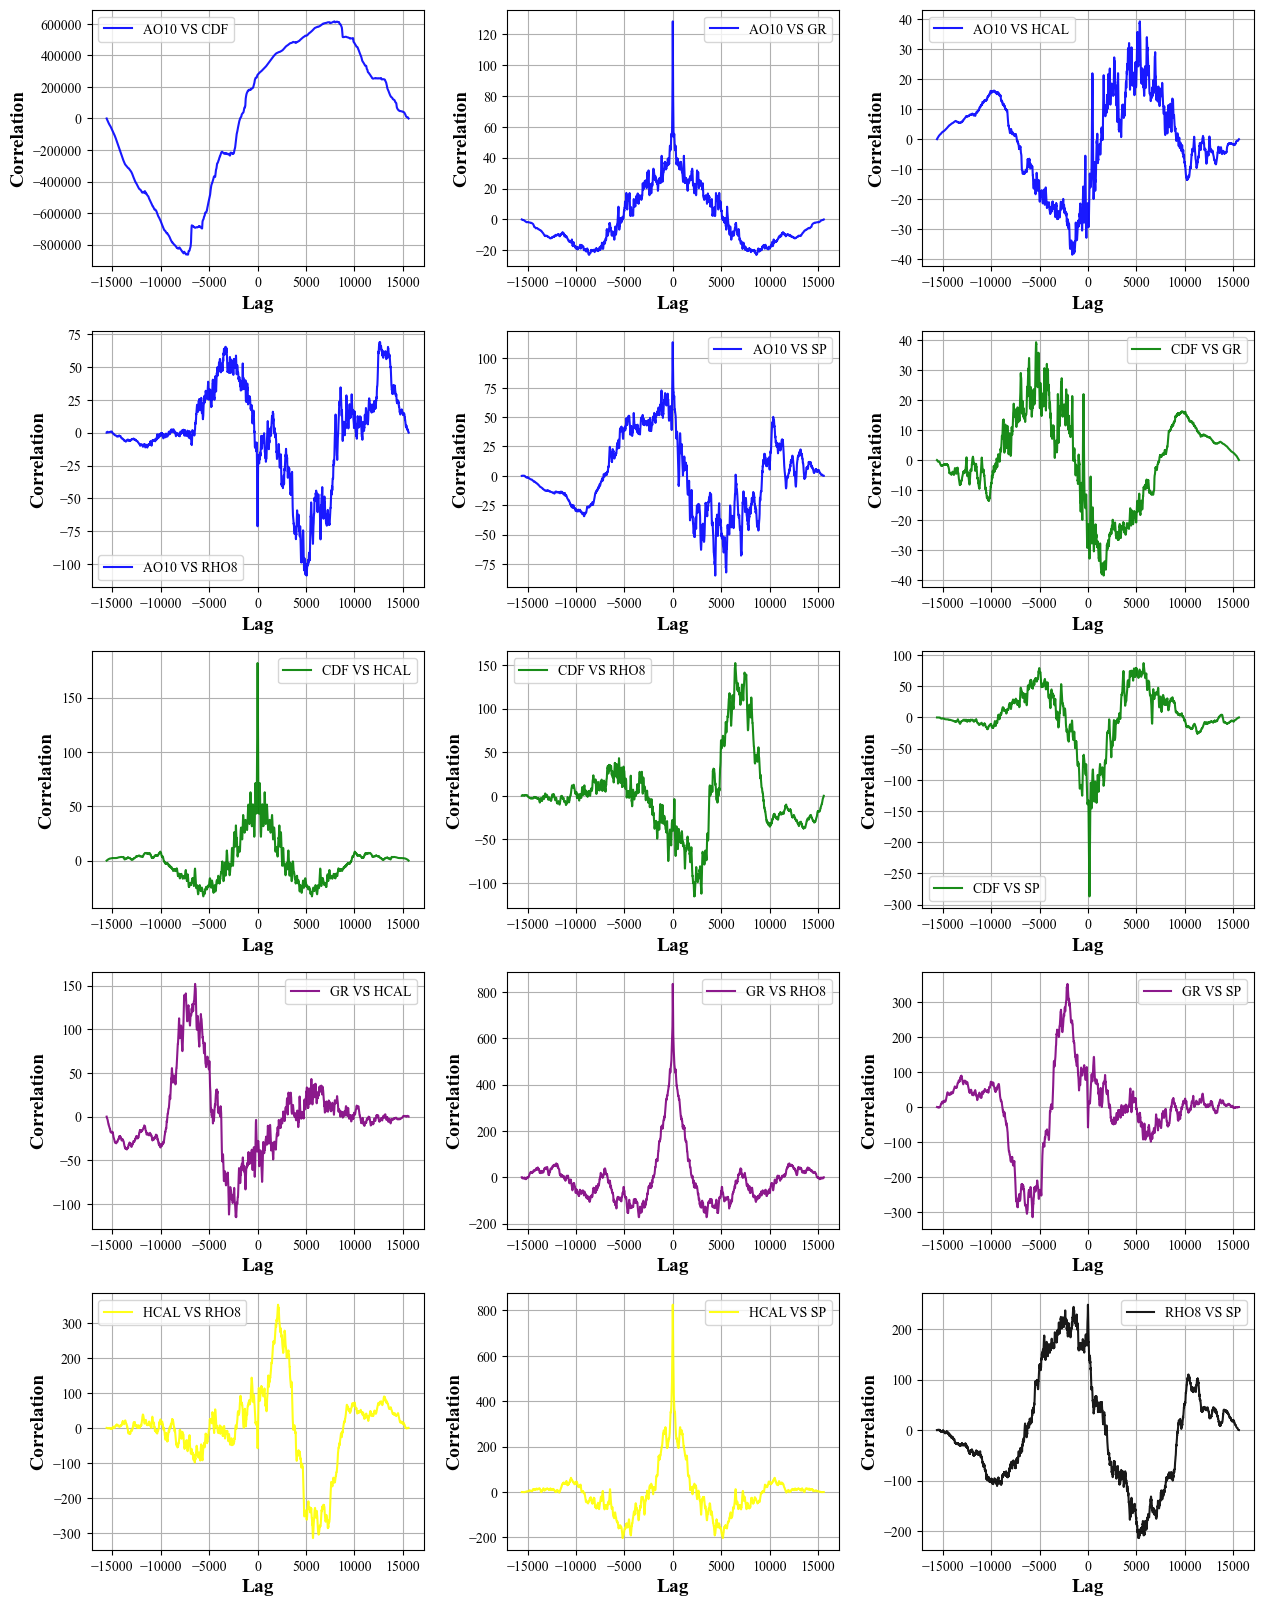

In [26]:
usefulProperties_fft_NV = ['DEPHT','AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

usefulProperties_fft_CCNV = ['CDF', 'GR', 'HCAL', 'RHO8', 'SP', 
                           'GR', 'HCAL', 'RHO8', 'SP', 
                           'HCAL', 'RHO8', 'SP',
                           'RHO8', 'SP',
                           'SP']
#units = {'AO10':'OHMM', 'CDF':'LBF', 'GR':'GAPI', 'HCAL':'IN', 'RHO8':'G/CM3', 'SP':'MV'}
pos = {'AO10':0, 'CDF':1, 'GR':2, 'HCAL':3, 'RHO8':4, 'SP':5}
colorP = {'AO10':'blue', 'CDF':'green', 'GR':'purple', 'HCAL':'yellow', 'RHO8':'black', 'SP':'orange'}
sectionCut = {'AO10': 0, 'CDF': 0, 'GR': 0, 'HCAL': 0, 'RHO8': 0, 'SP': 0} ## limits on the plot

plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 20))
axes = axes.flatten()

movil_1 = 1

for i, ax in enumerate(axes):

    
    movil_2 = pos[usefulProperties_fft_CCNV[i]] - 1

    #print(usefulProperties_fft_NV[movil_1])
    #print(usefulProperties_fft_CCNV[movil_2])
    
    #print('')

    y1Data = np_currambaData_filteredDeep_2standardized[movil_1,:]
    y2Data = np_currambaData_filteredDeep_2standardized[movil_2,:]

    yCorrelation = np.correlate(y1Data, y2Data, mode='full')
    xCorrelation = np.arange(-len(y1Data) + 1, len(y2Data))

    ax.plot(xCorrelation, yCorrelation, label = f'{usefulProperties_fft_NV[movil_1]} VS {usefulProperties_fft_CC[movil_2]}', color = colorP[usefulProperties_fft_NV[movil_1]], alpha=0.9)

    ax.set_ylabel(f'Correlation', fontweight='bold', fontsize=14, fontname='Times New Roman')
    ax.set_xlabel(f'Lag', fontweight='bold', fontsize=14, fontname='Times New Roman')

    ax.tick_params(axis='both', labelsize=10)

    #ax.set_xlim(0,2.5)
    ax.grid(True)
    ax.legend(fontsize=10)

    if i == 4 or i == 8 or i == 11 or i == 13:
        movil_1 = movil_1 + 1


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

# Pearson Correlation Coefficient - PCC

## NORMALIZED DATA

In [27]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

dataSimple = np_currambaData_filteredDeep_2standardized[1:, :]

correlation_matrix = np.corrcoef(dataSimple)

df_corr = pd.DataFrame(correlation_matrix, index = usefulProperties_fft, columns =usefulProperties_fft)

print(df_corr)

          AO10       CDF        GR      HCAL      RHO8        SP
AO10  1.000000 -0.163310 -0.213309  0.345547  0.634068 -0.602374
CDF  -0.163310  1.000000 -0.078601 -0.351653 -0.169182  0.108164
GR   -0.213309 -0.078601  1.000000 -0.069991  0.024946  0.190063
HCAL  0.345547 -0.351653 -0.069991  1.000000  0.294549 -0.126431
RHO8  0.634068 -0.169182  0.024946  0.294549  1.000000 -0.710776
SP   -0.602374  0.108164  0.190063 -0.126431 -0.710776  1.000000


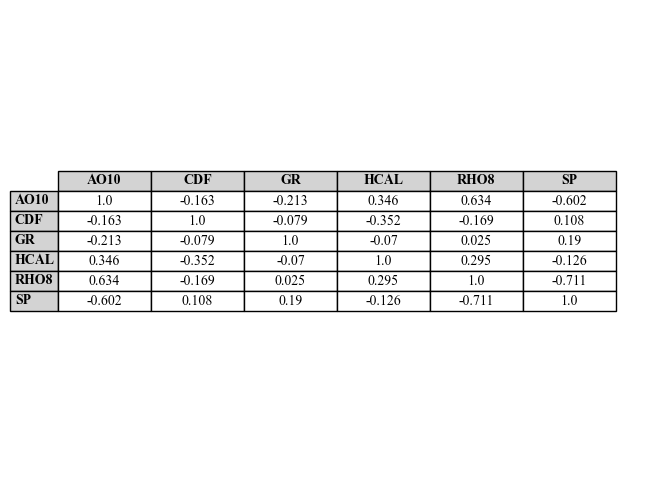

In [28]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('tight')
ax.axis('off')

table = plt.table(cellText = df_corr.round(3).values, 
                  colLabels = df_corr.columns, 
                  rowLabels = df_corr.index, 
                  cellLoc = 'center', 
                  loc='center',
                  colColours=["lightgray"] * len(df_corr.columns),
                  rowColours=["lightgray"] * len(df_corr.index),
                  colWidths=[0.10] * len(df_corr.columns))

table.scale(1.5, 1.2)

for key, cell in table.get_celld().items():
    cell.set_text_props(fontname='Times New Roman')

for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(fontweight='bold')

## LAG DATA

In [29]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']

dataSimple = np_positive_amplitude_Prom

correlation_matrix = np.corrcoef(dataSimple)

df_corr = pd.DataFrame(correlation_matrix, index = usefulProperties_fft, columns =usefulProperties_fft)

print(df_corr)

          AO10       CDF        GR      HCAL      RHO8        SP
AO10  1.000000  0.956801  0.964179  0.961798  0.886149  0.791320
CDF   0.956801  1.000000  0.914184  0.960645  0.804777  0.736108
GR    0.964179  0.914184  1.000000  0.962539  0.897167  0.910493
HCAL  0.961798  0.960645  0.962539  1.000000  0.847150  0.821693
RHO8  0.886149  0.804777  0.897167  0.847150  1.000000  0.836525
SP    0.791320  0.736108  0.910493  0.821693  0.836525  1.000000


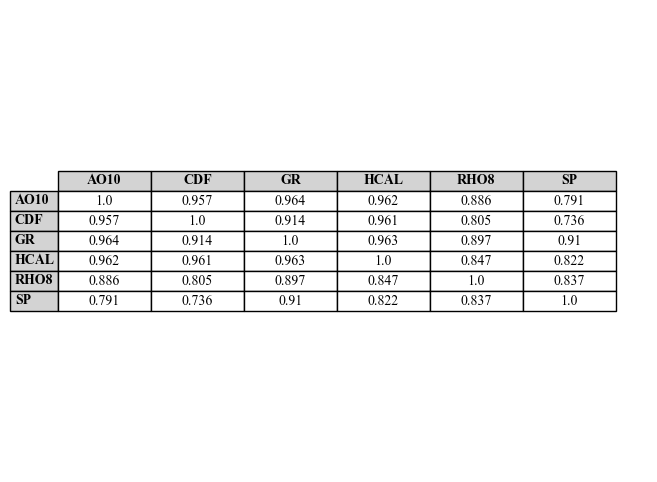

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('tight')
ax.axis('off')

table = plt.table(cellText = df_corr.round(3).values, 
                  colLabels = df_corr.columns, 
                  rowLabels = df_corr.index, 
                  cellLoc = 'center', 
                  loc='center',
                  colColours=["lightgray"] * len(df_corr.columns),
                  rowColours=["lightgray"] * len(df_corr.index),
                  colWidths=[0.10] * len(df_corr.columns))

table.scale(1.5, 1.2)

for key, cell in table.get_celld().items():
    cell.set_text_props(fontname='Times New Roman')

for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(fontweight='bold')

In [31]:
usefulProperties_fft = ['AO10', 'CDF', 'GR', 'HCAL', 'RHO8', 'SP']
pos = {'AO10':1, 'CDF':2, 'GR':3, 'HCAL':4, 'RHO8':5, 'SP':6}

dataSimple = np_currambaData_filteredDeep_2standardized[1:,:]

pairsN = list()
pairsL = list()
correlation_matrix = np.zeros((len(usefulProperties_fft), len(usefulProperties_fft)))

for i, prop1 in enumerate(usefulProperties_fft):
    for j, prop2 in enumerate(usefulProperties_fft):
        #pairsN.append((prop1, prop2))
        #print(i, j)
        #print(prop1, prop2)
        PCC = np.corrcoef(dataSimple[i, :], dataSimple[j, :])[0, 1]
        #print(PCC)
        #print('')
        correlation_matrix[i, j] = PCC
        
df_corr = pd.DataFrame(correlation_matrix, index=usefulProperties_fft, columns=usefulProperties_fft)

print(df_corr)


          AO10       CDF        GR      HCAL      RHO8        SP
AO10  1.000000 -0.163310 -0.213309  0.345547  0.634068 -0.602374
CDF  -0.163310  1.000000 -0.078601 -0.351653 -0.169182  0.108164
GR   -0.213309 -0.078601  1.000000 -0.069991  0.024946  0.190063
HCAL  0.345547 -0.351653 -0.069991  1.000000  0.294549 -0.126431
RHO8  0.634068 -0.169182  0.024946  0.294549  1.000000 -0.710776
SP   -0.602374  0.108164  0.190063 -0.126431 -0.710776  1.000000
